<a href="https://colab.research.google.com/github/ericksalignac/spotify-dataset-for-eda/blob/main/Spotify_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparando o ambiente

In [ ]:
# importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

# melhorar a visualização
%matplotlib inline
mpl.style.use('ggplot')
plt.style.use('fivethirtyeight')
sns.set(context='notebook', palette='dark', color_codes=True)

## Preparando os dados

In [ ]:
# carregando dataset
df = pd.read_csv('https://raw.githubusercontent.com/ericksalignac/spotify-dataset-for-eda/main/dataset.csv', index_col=0)

####Column Description

- **track_id**: o ID do Spotify para a faixa
- **artistas**: Os nomes dos artistas que executaram a faixa. Se houver mais de um artista, eles são separados por um ;
- **album_name**: O nome do álbum no qual a faixa aparece
- **track_name**: Nome da faixa
- **popularidade**: A popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo e é baseada, em grande parte, no número total de reproduções que a faixa teve e quão recentes são essas reproduções. De um modo geral, as músicas que estão sendo muito tocadas agora terão uma popularidade maior do que as músicas que eram muito tocadas no passado. Faixas duplicadas (por exemplo, a mesma faixa de um single e um álbum) são classificadas de forma independente. A popularidade do artista e do álbum é derivada matematicamente da popularidade da faixa.
- **duration_ms**: A duração da trilha em milissegundos
- **explicit**: Se a faixa tem ou não letras explícitas (true = sim, tem; - false = não, não tem OU desconhecido)
- **danceability**: Danceability descreve o quanto uma faixa é adequada para dançar com base em uma combinação de elementos musicais, incluindo andamento, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é menos dançável e 1,0 é o mais dançável
- **energia**: A energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, death metal tem alta energia, enquanto um prelúdio de Bach pontua baixo na escala
- **key**: A tonalidade em que a faixa está. Os inteiros são mapeados para as notas usando a notação padrão de classe de notas. Por exemplo. 0 = C, 1 = C♯/D♭, 2 = D e assim por diante. Se nenhuma chave foi detectada, o valor é -1
- **Loudness**: O volume geral de uma faixa em decibéis (dB)
- **modo**: Modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0
- **locução**: A locução detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente semelhante à fala for a gravação (por exemplo, talk show, livro de áudio, poesia), mais próximo de 1,0 será o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como rap. Valores abaixo de 0,33 provavelmente representam música e outras faixas não semelhantes à fala
- **acústica**: Uma medida de confiança de 0,0 a 1,0 se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica
- **instrumentalidade**: prevê se uma faixa não contém vocais. Os sons "Ooh" e "aah" são tratados como instrumentais neste contexto. Faixas de rap ou palavras faladas são claramente "vocais". Quanto mais próximo o valor da - instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter nenhum conteúdo vocal
- **liveness**: Detecta a presença de uma audiência na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido tocada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa
- **valência**: Uma medida de 0,0 a 1,0 que descreve a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimido, zangado)
- **andamento**: O andamento geral estimado de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida
- **time_signature**: uma fórmula de compasso estimada. A fórmula de compasso (medidor) é uma convenção de notação para especificar quantas batidas há em cada compasso (ou compasso). A fórmula de compasso varia de 3 a 7, indicando fórmulas de compasso de 3/4 a 7/4.
- **track_genre**: O gênero ao qual a faixa pertence

#### Encontrando dados faltantes

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [ ]:
print(df.isna().sum())

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


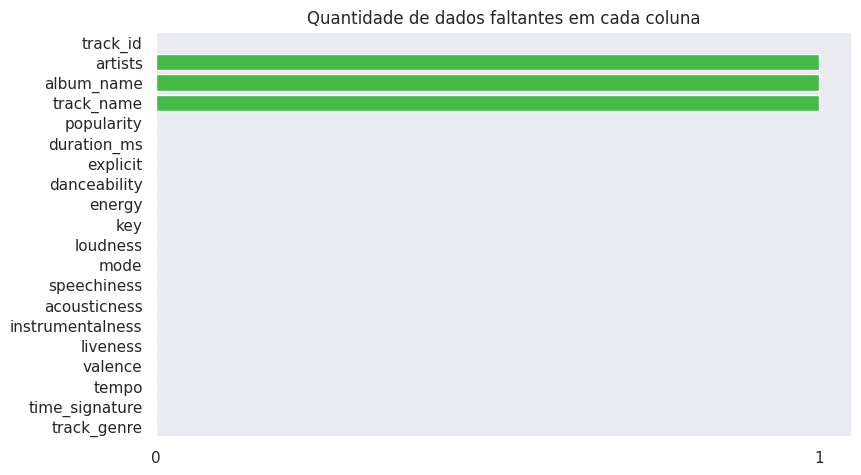

In [ ]:
plt.figure(figsize=(8,5))
data = pd.DataFrame(data = df.isna().sum()).transpose()
sns.barplot(data, orient='h',color='limegreen').set_title('Quantidade de dados faltantes em cada coluna')
plt.xticks(ticks=[0,1])
plt.grid(visible=False)

In [ ]:
df[df['artists'].isna()]

track_id artists album_name track_name  popularity  \
65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN           0   

       duration_ms  explicit  danceability  energy  key  loudness  mode  \
65900            0     False         0.501   0.583    7     -9.46     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
65900       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature track_genre  
65900  138.391               4       k-pop

In [ ]:
# removendo registro com dados faltantes
df = df.dropna()

#### Criando uma nova coluna "is_feature"

In [ ]:
df["artists"] = df.artists.astype(str)
df['is_feature'] = df['artists'].str.contains(';')
pd.set_option('display.max_columns', df.shape[1])
df

<ipython-input-77-cde5b0135c97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["artists"] = df.artists.astype(str)
<ipython-input-77-cde5b0135c97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_feature'] = df['artists'].str.contains(';')


track_id                 artists  \
0       5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1       4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2       1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3       6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4       5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...                        ...                     ...   
113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1              0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2              0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3              0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4              0.618  0.4430    2    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350    5   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170    0   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290    0   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060    7   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870    1   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.976000    0.1050   0.0350   85.239               4   
113997          0.000000    0.0839   0.7430  132.378               4   
113998          0.000000    0.2700

## Análise exploratória

### Tópicos de interesse:
- Quais os artistas mais populares
- Quais são as 100 músicas mais populares
- Quantas delas foram feitas sozinhas e quantas são ft (feature)
- Quais são os gêneros mais populares
- Quais artistas compuseram mais músicas dentro dos 100 mais populares


### Quais são os 10 gêneros mais populares?


**Interpretando o gráfico**

O gráfico de barras mostra os **10 gêneros mais populares no Spotify**, onde cada barra representa um gênero (identificados no eixo x) e a altura da barra indica a popularidade média correspondente (identificada no eixo y). O texto acima de cada barra mostra o valor da popularidade média para cada gênero. A linha horizontal tracejada representa a média geral da popularidade de todas as músicas. Isso permite comparar visualmente a popularidade média de cada gênero em relação à média geral. O gráfico é acompanhado por títulos, rótulos de eixos e legenda para facilitar a interpretação dos dados.

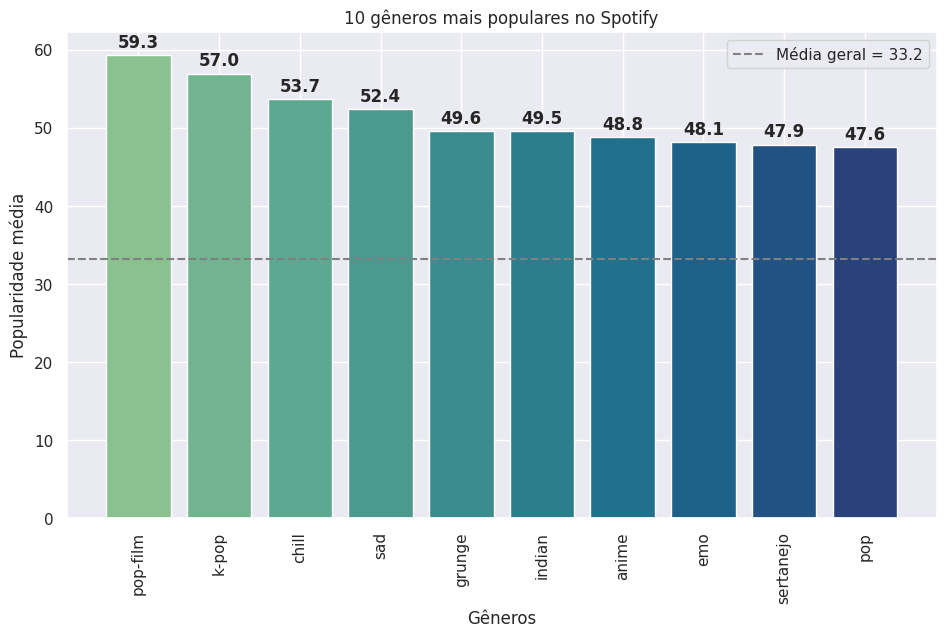

In [ ]:
# Agrupar as músicas por gênero e calcular a média da popularidade de cada gênero
grouped = df.groupby('track_genre')['popularity'].mean().reset_index()

# Selecionar os 10 gêneros mais populares
top_10 = grouped.sort_values(by='popularity', ascending=False).head(10)

# Criar o gráfico de barras
# colors = ['green', 'blue', 'purple', 'orange', 'red', 'gray', 'pink', 'brown', 'yellow', 'cyan']
colors = sns.color_palette("crest", n_colors=10)
mean_popularity = grouped['popularity'].mean()
plt.figure(figsize=(10, 6))
plt.bar(top_10['track_genre'], top_10['popularity'], color=colors)

for i, v in enumerate(grouped['popularity'].nlargest(10)):
    plt.text(i, v+1, str(round(v, 1)), horizontalalignment='center', fontweight='bold')

plt.axhline(y=mean_popularity, color='gray', linestyle='--', label=f'Média geral = {round(mean_popularity, 1)}')
plt.xticks(rotation=90)
plt.xlabel('Gêneros')
plt.ylabel('Popularidade média')
plt.title('10 gêneros mais populares no Spotify')
plt.legend()
plt.show()

### Quais são os 10 artistas mais populares

**Interpretando o gráfico**

O gráfico de barras mostra os **10 artistas mais populares no Spotify**, onde cada barra representa um artista  (identificados no eixo x) e a altura da barra indica a popularidade média correspondente  (identificada no eixo y). O texto acima de cada barra mostra o valor da popularidade média para cada artista. Uma linha horizontal tracejada representa a média geral da popularidade de todas as músicas. Isso permite comparar visualmente a popularidade média de cada artista em relação à média geral. O gráfico é acompanhado por títulos, rótulos de eixos e legenda para facilitar a interpretação dos dados.

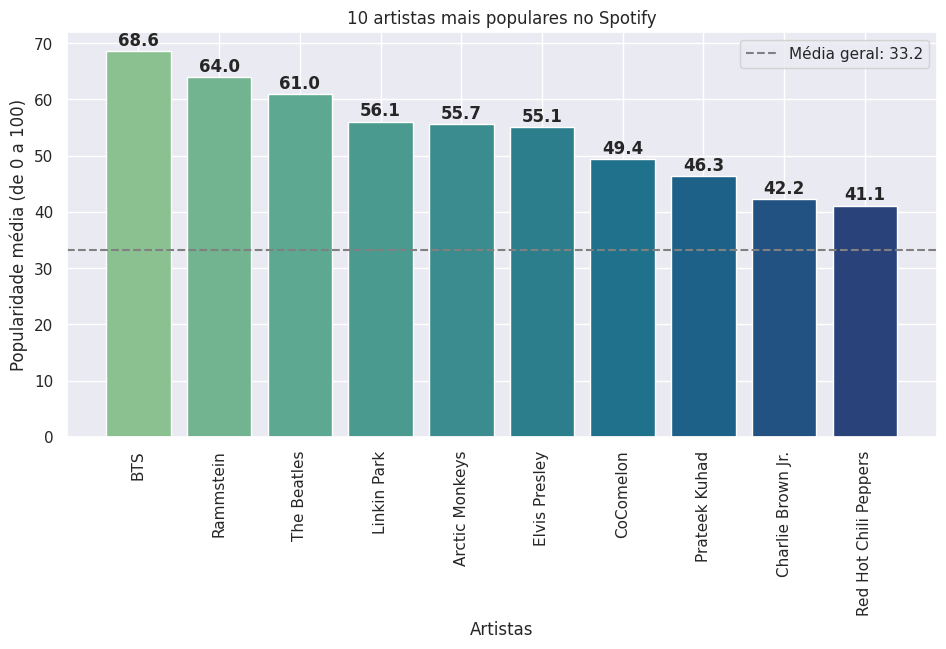

In [ ]:
# Agrupar as músicas por artista e somar a pontuação de popularidade de cada uma
artist_popularity = df.groupby('artists')['popularity'].sum()

# Ordenar os resultados em ordem decrescente e selecionar os 10 primeiros
top_10_artists = artist_popularity.sort_values(ascending=False).head(10)

# Selecionar as músicas dos 10 artistas mais populares
top_10 = df[df['artists'].isin(top_10_artists.index)]

# Calcular a popularidade média por artista
grouped = top_10.groupby('artists')['popularity'].mean().reset_index().sort_values(by='popularity', ascending=False)

# Definir a paleta de cores para o gráfico de barras
colors = sns.color_palette('crest', n_colors=10)

# Criar o gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(grouped['artists'], grouped['popularity'], color=colors)
plt.xticks(rotation=90)
plt.xlabel('Artistas')
plt.ylabel('Popularidade média (de 0 a 100)')
plt.title('10 artistas mais populares no Spotify')

# Adicionar rótulos às barras com o valor da popularidade média
for i, v in enumerate(grouped['popularity']):
    plt.text(i, v+1, str(round(v, 1)), horizontalalignment='center', fontweight='bold')

# Adicionar linha vertical no gráfico para indicar a média geral da popularidade das músicas
mean_popularity = df['popularity'].mean()
plt.axhline(y=mean_popularity, color='gray', linestyle='--', label=f'Média geral: {round(mean_popularity, 1)}')
plt.legend()
plt.show()

### Quantas das musicas mais populares são ft (features) e quantas foram feitas sozinhas

**Interpretando o gráfico**   

O gráfico de barras mostra a **quantidade de músicas com participação de outros artistas (features) e a quantidade de músicas feitas por um único artista entre as 100 músicas mais populares**. As barras são coloridas em verde, e os valores exatos de músicas features e solo entre as top 100 são exibidos acima das barras. 

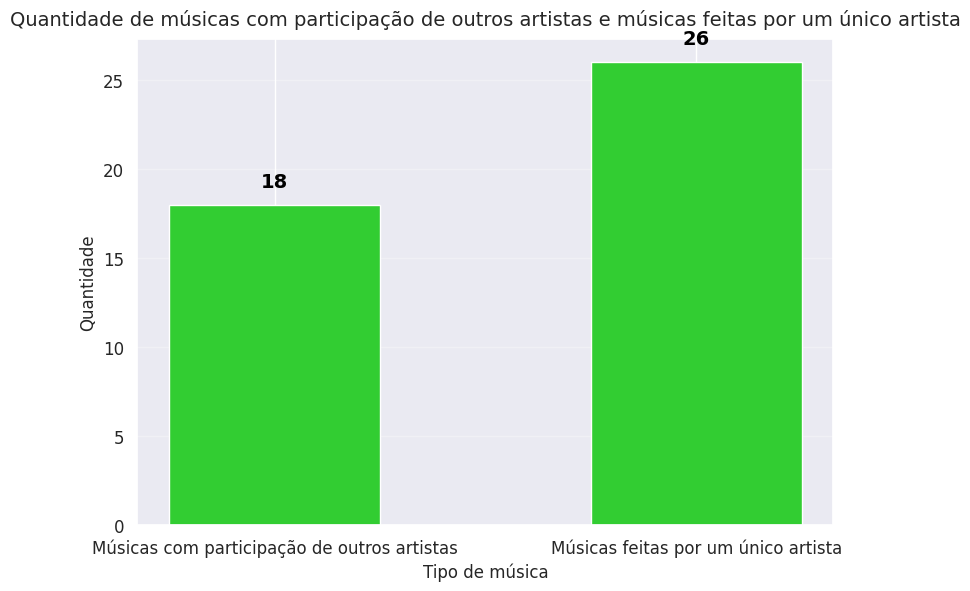

In [ ]:
# Selecionar as 100 músicas mais populares
top_100 = df.nlargest(100, 'popularity')

# Criar nova coluna indicando se há participação de outros artistas
top_100['featuring'] = top_100['artists'].apply(lambda x: ';' in x.lower())

# Separar músicas com participação de outros artistas das músicas feitas por um único artista
ft_music = top_100[top_100['featuring'] == True].drop_duplicates(subset=['track_name', 'artists'])
no_ft_music = top_100[top_100['featuring'] == False].drop_duplicates(subset=['track_name', 'artists'])
 
# Contar a quantidade de músicas com participação de outros artistas e a quantidade de músicas feitas por um único artista
ft_count = len(ft_music)
no_ft_count = len(no_ft_music)

# Criar o gráfico
plt.figure(figsize=(8,6))
plt.bar(['Músicas com participação de outros artistas', 'Músicas feitas por um único artista'], [ft_count, no_ft_count], width=0.5, color='limegreen')
plt.title('Quantidade de músicas com participação de outros artistas e músicas feitas por um único artista', fontsize=14, pad=10)
plt.xlabel('Tipo de música', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3, axis='y')
for i, v in enumerate([ft_count, no_ft_count]):
    plt.text(i, v+1, str(v), color='black', ha='center', fontweight='bold', fontsize=14)
plt.show()



### Dataset sem repetições ordenado pela popularidade

Encontrando registros duplicados

In [ ]:
# O dataset contém registros da mesma música variando apenas o gênero e a popularidade
ranked_data = df.sort_values('popularity', ascending=False)
ranked_data[(ranked_data['track_name'] == 'Efecto') & (ranked_data['artists'] == 'Bad Bunny')]

track_id    artists        album_name track_name  \
68359  5Eax0qFko2dh7Rl2lYs3bx  Bad Bunny  Un Verano Sin Ti     Efecto   
67559  5Eax0qFko2dh7Rl2lYs3bx  Bad Bunny  Un Verano Sin Ti     Efecto   
88451  5Eax0qFko2dh7Rl2lYs3bx  Bad Bunny  Un Verano Sin Ti     Efecto   
89451  5Eax0qFko2dh7Rl2lYs3bx  Bad Bunny  Un Verano Sin Ti     Efecto   

       popularity  duration_ms  explicit  danceability  energy  key  loudness  \
68359          96       213061     False         0.801   0.475    7    -8.797   
67559          96       213061     False         0.801   0.475    7    -8.797   
88451          95       213061     False         0.801   0.475    7    -8.797   
89451          95       213061     False         0.801   0.475    7    -8.797   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
68359     0       0.0516         0.141          0.000017    0.0639    0.234   
67559     0       0.0516         0.141          0.000017    0.0639    0.234   
88451     0       0.0516         0.141          0.000017    0.0639    0.234   
89451     0       0.0516         0.141          0.000017    0.0639    0.234   

        tempo  time_signature track_genre  is_feature  
68359  98.047               4      latino       False  
67559  98.047               4       latin       False  
88451  98.047               4      reggae       False  
89451  98.047               4   reggaeton       False

Diferenciando as músicas

In [ ]:
# Utilizando o critério do tempo em mili-segundos para distiguir as músicas, além das características que estamos interessados
ranked_distinct_songs = df[['track_id','artists', 'track_name', 'popularity', 'duration_ms', 'track_genre', 'is_feature']]
ranked_distinct_songs = ranked_distinct_songs.drop_duplicates(subset=['track_id','artists', 'track_name','duration_ms'])
ranked_distinct_songs = ranked_distinct_songs.sort_values('popularity', ascending=False)
ranked_distinct_songs.drop('duration_ms', axis=1, inplace=True)
ranked_distinct_songs = ranked_distinct_songs.reset_index(drop='index')
ranked_distinct_songs['artist_song'] = ranked_distinct_songs['track_name'] + ' - ' + ranked_distinct_songs['artists']
ranked_distinct_songs.shape

(89740, 7)

In [ ]:
ranked_distinct_songs.head(30)

track_id                      artists  \
0   3nqQXoyQOWXiESFLlDF1hG         Sam Smith;Kim Petras   
1   2tTmW7RDtMQtBk7m2rYeSw             Bizarrap;Quevedo   
2   4uUG5RXrOk84mYEfFvj3cK      David Guetta;Bebe Rexha   
3   5ww2BF9slyYgNOk37BlC4u                Manuel Turizo   
4   6Sq7ltF9Qa7SNFBsV5Cogx   Bad Bunny;Chencho Corleone   
5   1IHWl5LamUGEuP4ozKQSXZ                    Bad Bunny   
6   5Eax0qFko2dh7Rl2lYs3bx                    Bad Bunny   
7   5IgjP7X4th6nMNDh4akUHb                  Chris Brown   
8   4h9wh7iOZ0GGn8QVp4RAOB                  OneRepublic   
9   4LRPiXqCikLlN15c3yImP7                 Harry Styles   
10  3k3NWokhRRkEPhCzPmV8TW      Bad Bunny;Bomba Estéreo   
11  6xGruZOHLs39ZbVccQTuPZ                         Joji   
12  6Xom58OOXk2SoU711L2IXO                    Bad Bunny   
13  1xzi1Jcr7mEi9K2RfzLOqS                      Beyoncé   
14  2QjOHCTQ1Jl3zawyYOpxh6            The Neighbourhood   
15  3JvKfv6T31zO0ini8iNItO                    Tom Odell   
16  31i56LZnwE6uSu3exoHjtB                    Bad Bunny   
17  7dSZ6zGTQx66c2GF91xCrb                      KAROL G   
18  4Dvkj6JhhA12EX05fT7y2e                 Harry Styles   
19  0mBP9X2gPCuapvpZ7TGDk3   Charlie Puth;Jung Kook;BTS   
20  5XeFesFbtLpXzIVDNQP22n               Arctic Monkeys   
21  0WtM2NBVQNNJLh6scP13H8            Rema;Selena Gomez   
22  4C6Uex2ILwJi9sZXRdmqXp                  Nicki Minaj   
23  41oY4WCTj5kccfesTVFnvN             Bad Bunny;Jhayco   
24  79HZAZNnOE97rb2hnI0XQr  Rauw Alejandro;Lyanno;Brray   
25  3F5CgOj3wFlRv51JsHbxhe              Drake;21 Savage   
26  6i1g5ZRmJZAkDwBaUZ3f2i                    Luar La L   
27  0VjIjW4GlUZAMYd2vXMi3b                   The Weeknd   
28  1cKHdTo9u0ZymJdPGSh6nq     The Weeknd;Gesaffelstein   
29  4tYFy8ALRjIZvnvSLw5lxN     Bad Bunny;Rauw Alejandro   

                                 track_name  popularity track_genre  \
0                 Unholy (feat. Kim Petras)         100       dance   
1     Quevedo: Bzrp Music Sessions, Vol. 52          99     hip-hop   
2                           I'm Good (Blue)          98       dance   
3                                La Bachata          98       latin   
4                           Me Porto Bonito          97       latin   
5                          Tití Me Preguntó          97       latin   
6                                    Efecto          96       latin   
7                       Under The Influence          96       dance   
8                           I Ain't Worried          96       piano   
9                                 As It Was          95         pop   
10                            Ojitos Lindos          95       latin   
11                            Glimpse of Us          94         pop   
12                              Moscow Mule          94       latin   
13                                  CUFF IT          93       dance   
14                          Sweater Weather          93    alt-rock   
15                             Another Love          93       chill   
16                                 Neverita          93       latin   
17                                 PROVENZA          93      reggae   
18                                As It Was          92         pop   
19  Left and Right (Feat. Jung Kook of BTS)          92       dance   
20                         I Wanna Be Yours          92      garage   
21            Calm Down (with Selena Gomez)          92         pop   
22                        Super Freaky Girl          92       dance   
23                                    Tarot          91       latin   
24                                   LOKERA          91       latin   
25            Jimmy Cooks (feat. 21 Savage)          91     hip-hop   
26                                    Caile          91       latin   
27                          Blinding Lights          91         pop   
28                        I Was Never There          90         pop   
29                                    Party          90   

### Popularidade (composições solo e feat)

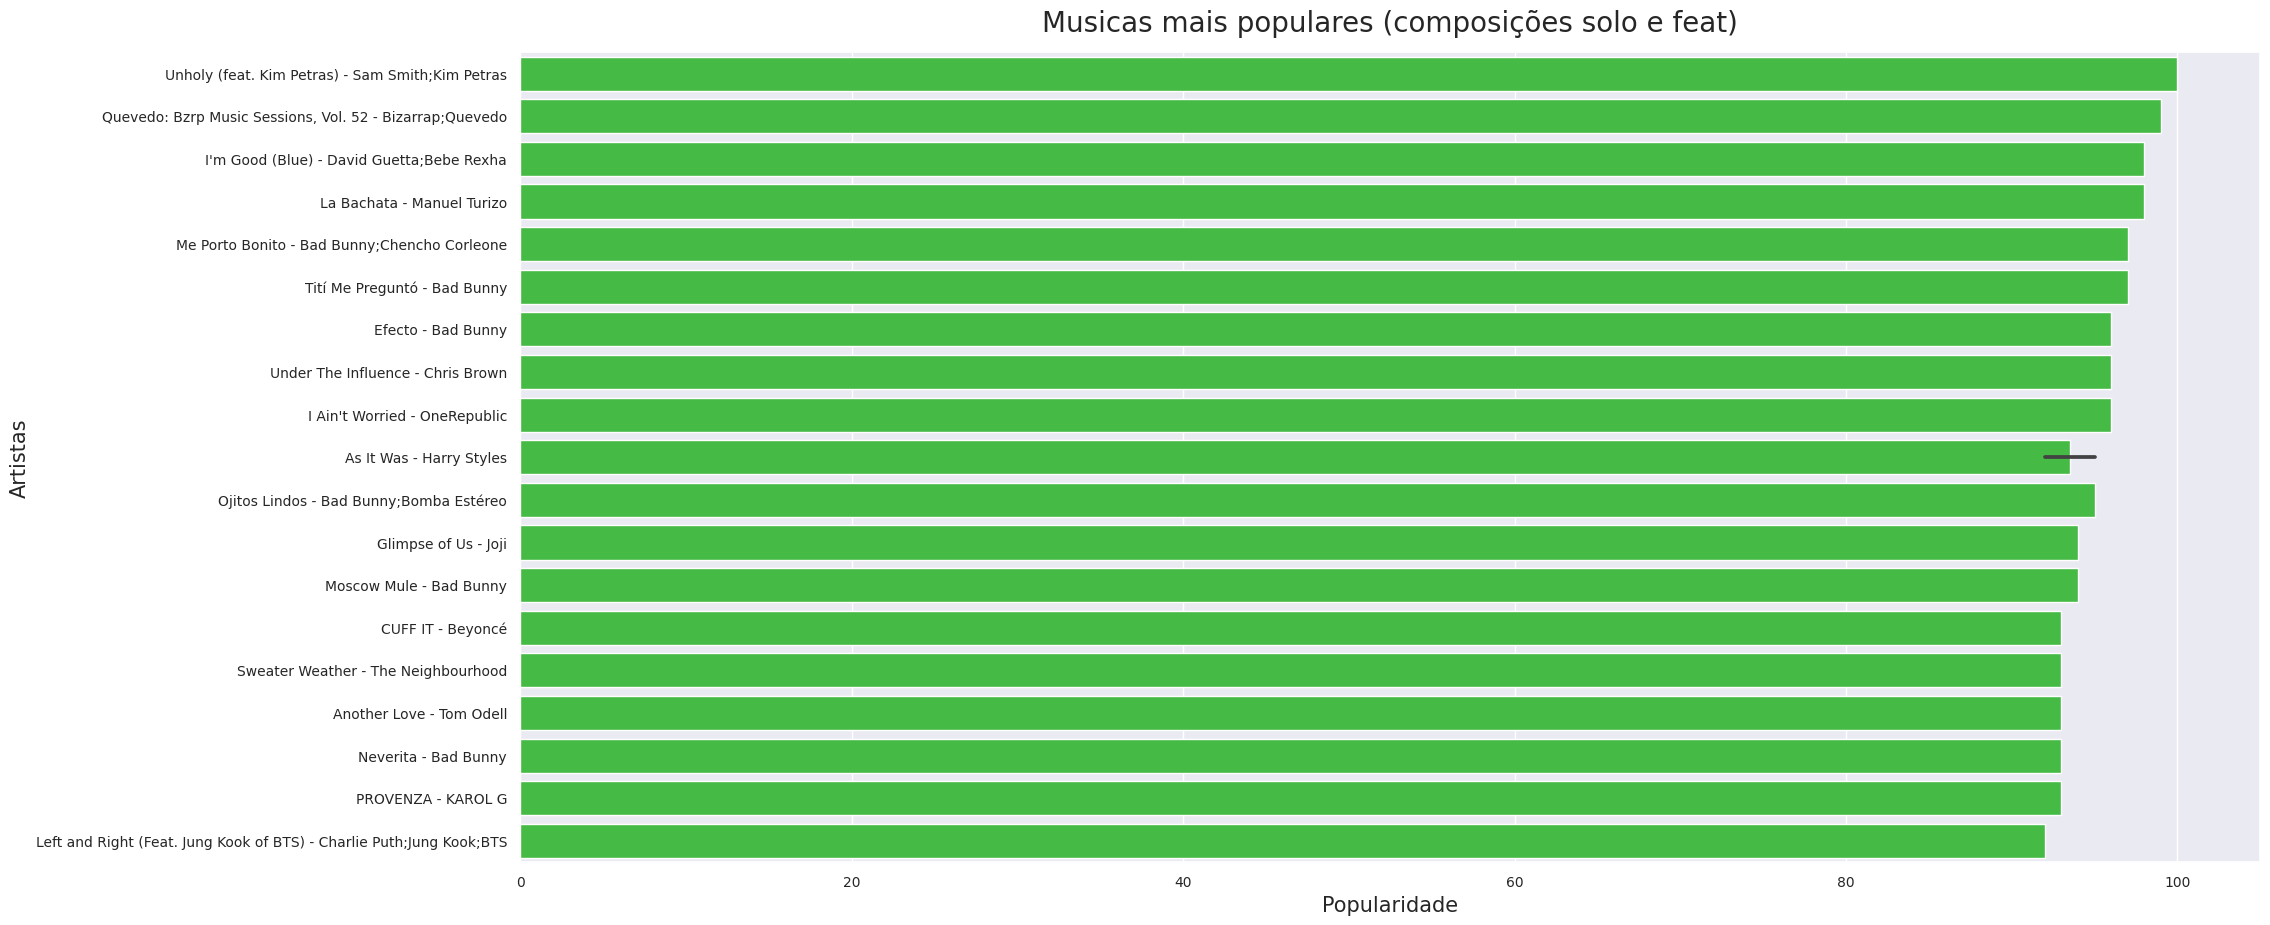

In [ ]:
# definiu o tamanho da figura 
plt.figure(figsize=(20,10))
# plotou gráfico de barras, com o eixo x sendo a populariadade e o eixo y sendo o artista
bar = sns.barplot(data=ranked_distinct_songs.head(20),y='artist_song', x='popularity', color='limegreen').set_title('Musicas mais populares (composições solo e feat)', fontsize=20, pad=15)
#colacando os títulos nos eixos 
bar.axes.set_ylabel('Artistas',fontsize=15)
bar.axes.set_xlabel('Popularidade',fontsize=15)
# diminuindo a fonte 
bar.axes.tick_params(axis='both', which='major', labelsize=10)
bar.axes.tick_params(axis='x', which='major', labelsize=10)

In [ ]:
# Quais os artistas que aparecem mais vezes nas músicas mais populares?

artists = []
for i in range(0,100):
  lista = ranked_distinct_songs.head(100)['artists'].values[i].split(';')
  for artist in range(0,len(lista)):
    artists.append(lista[artist])

# Frequência dos artistas nos top 100
top_100_count = pd.Series(artists).value_counts()
top_100_count = pd.DataFrame(top_100_count, columns=['frequency'])
top_100_count.reset_index(names='artists', inplace=True)
top_100_count.head(30)

artists  frequency
0           Bad Bunny         12
1          The Weeknd          7
2      Arctic Monkeys          4
3          Ed Sheeran          3
4      Rauw Alejandro          3
5      Olivia Rodrigo          3
6        Harry Styles          3
7           Sam Smith          2
8       Justin Bieber          2
9           Lil Nas X          2
10            KAROL G          2
11           Doja Cat          2
12    Imagine Dragons          2
13               Feid          2
14      Billie Eilish          2
15             Khalid          2
16                BTS          2
17              Drake          2
18  The Neighbourhood          2
19   Chencho Corleone          2
20                IVE          1
21         Zach Bryan          1
22       Taylor Swift          1
23         Ñengo Flow          1
24            Imanbek          1
25           Anuel AA          1
26         Chris Jedi          1
27      Glass Animals          1
28              Lizzo          1
29            J. Cole          1


Neste gráfico está a frequência dos artistas, nesse gráfico vemos que o artista mais frequente é Bad bunny 

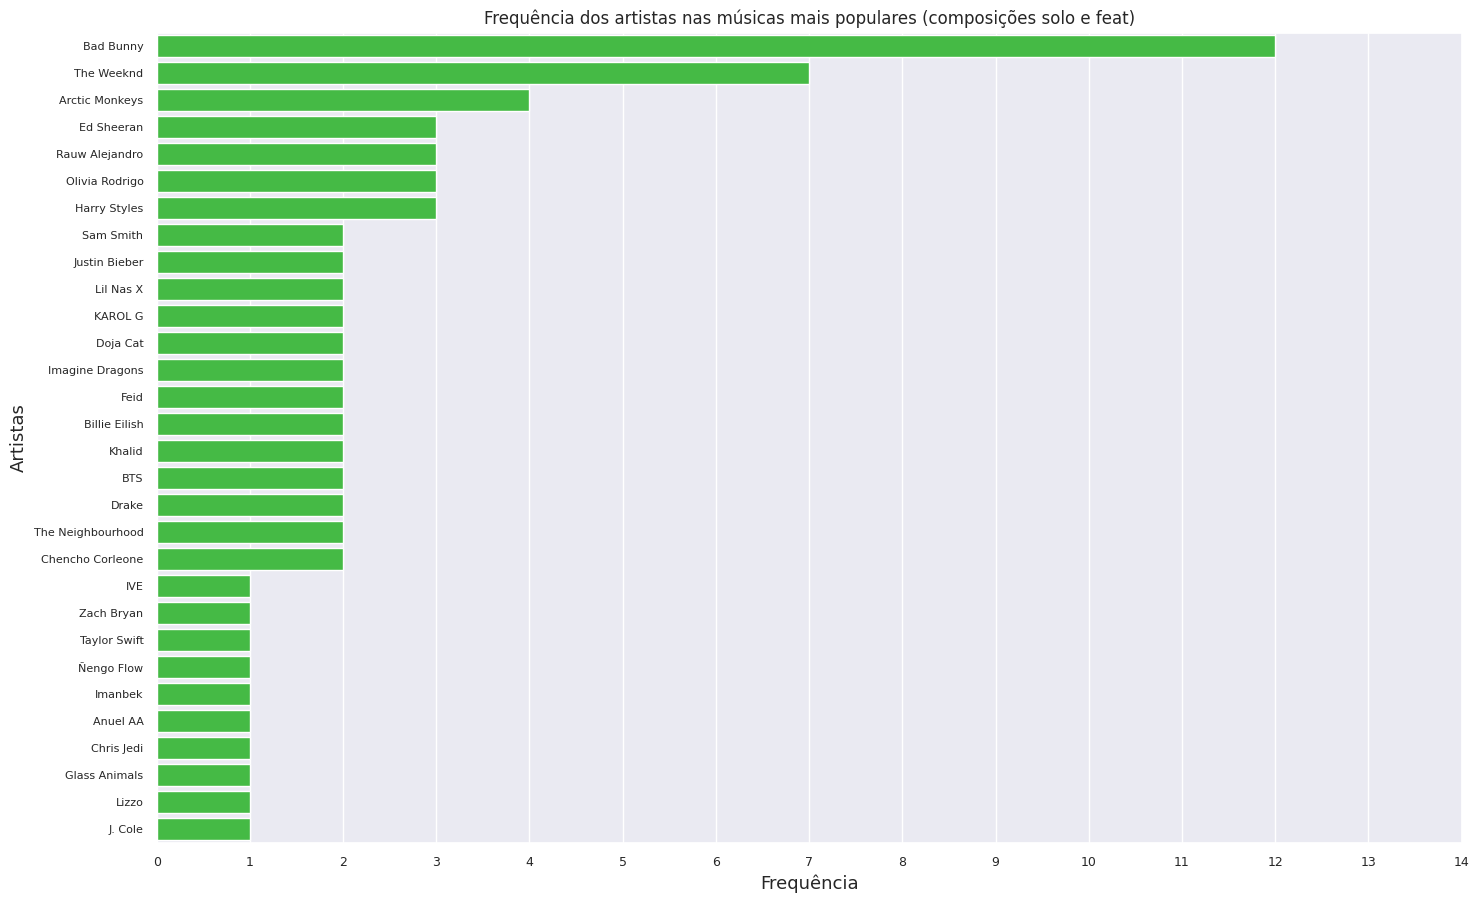

In [ ]:
plt.figure(figsize=(15,10))
bar = sns.barplot(data=top_100_count.head(30), x='frequency', y='artists', orient='h', color='limegreen').set_title('Frequência dos artistas nas músicas mais populares (composições solo e feat)')
plt.xticks(ticks=range(0,15))
bar.axes.set_ylabel('Artistas',fontsize=13)
bar.axes.set_xlabel('Frequência',fontsize=13)
bar.axes.tick_params(axis='both', which='major', labelsize=8)
bar.axes.tick_params(axis='x', which='major', labelsize=9)

###Popularidade (solo)

Encontrando músicas com um único compositor 

In [ ]:
# nesta parte foi colocado um filtro para não aparecer as músicas com feat
musicas_solo = ranked_distinct_songs[ranked_distinct_songs['is_feature'] == False]

Está sendo aprensentado as músicas sem o feat e ao mesmo tempo as mais populares 





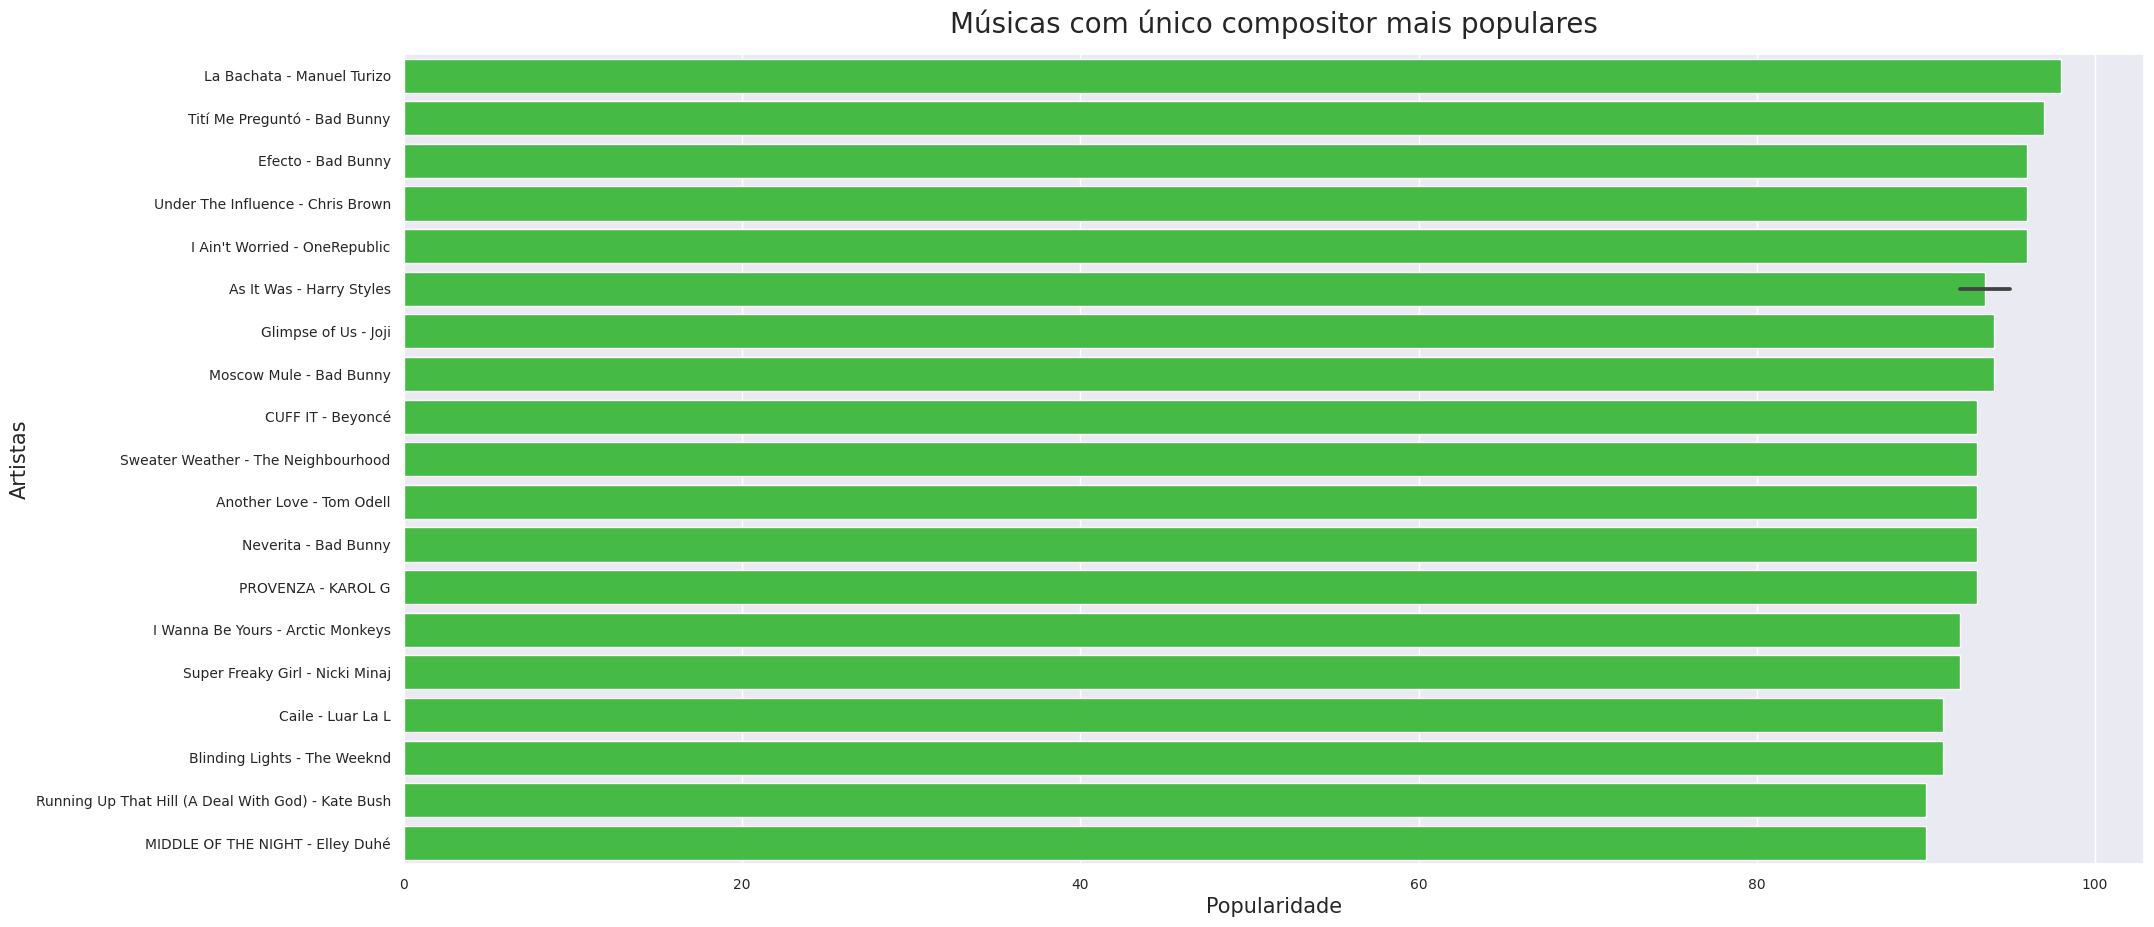

In [ ]:
plt.figure(figsize=(20,10))
bar = sns.barplot(data=musicas_solo.head(20),y='artist_song', x='popularity', color='limegreen').set_title('Músicas com único compositor mais populares', fontsize=20, pad=15)
bar.axes.set_ylabel('Artistas',fontsize=15)
bar.axes.set_xlabel('Popularidade',fontsize=15)
bar.axes.tick_params(axis='both', which='major', labelsize=10)
bar.axes.tick_params(axis='x', which='major', labelsize=10)

In [ ]:
# Quais os artistas que aparecem mais vezes nas músicas mais populares?

artists = []
for i in range(0,100):
  lista = musicas_solo.head(100)['artists'].values[i].split(';')
  for artist in range(0,len(lista)):
    artists.append(lista[artist])

# Frequência dos artistas nos top 100
top_100_solo_count = pd.Series(artists).value_counts()
top_100_solo_count = pd.DataFrame(top_100_solo_count, columns=['frequency'])
top_100_solo_count.reset_index(names='artists', inplace=True)
top_100_solo_count.head()

artists  frequency
0          Bad Bunny          9
1     Olivia Rodrigo          5
2         The Weeknd          5
3     Arctic Monkeys          4
4  The Neighbourhood          3

Mostrando os artistas que aparecem mais vezes dentro das 100 músicas mais populares

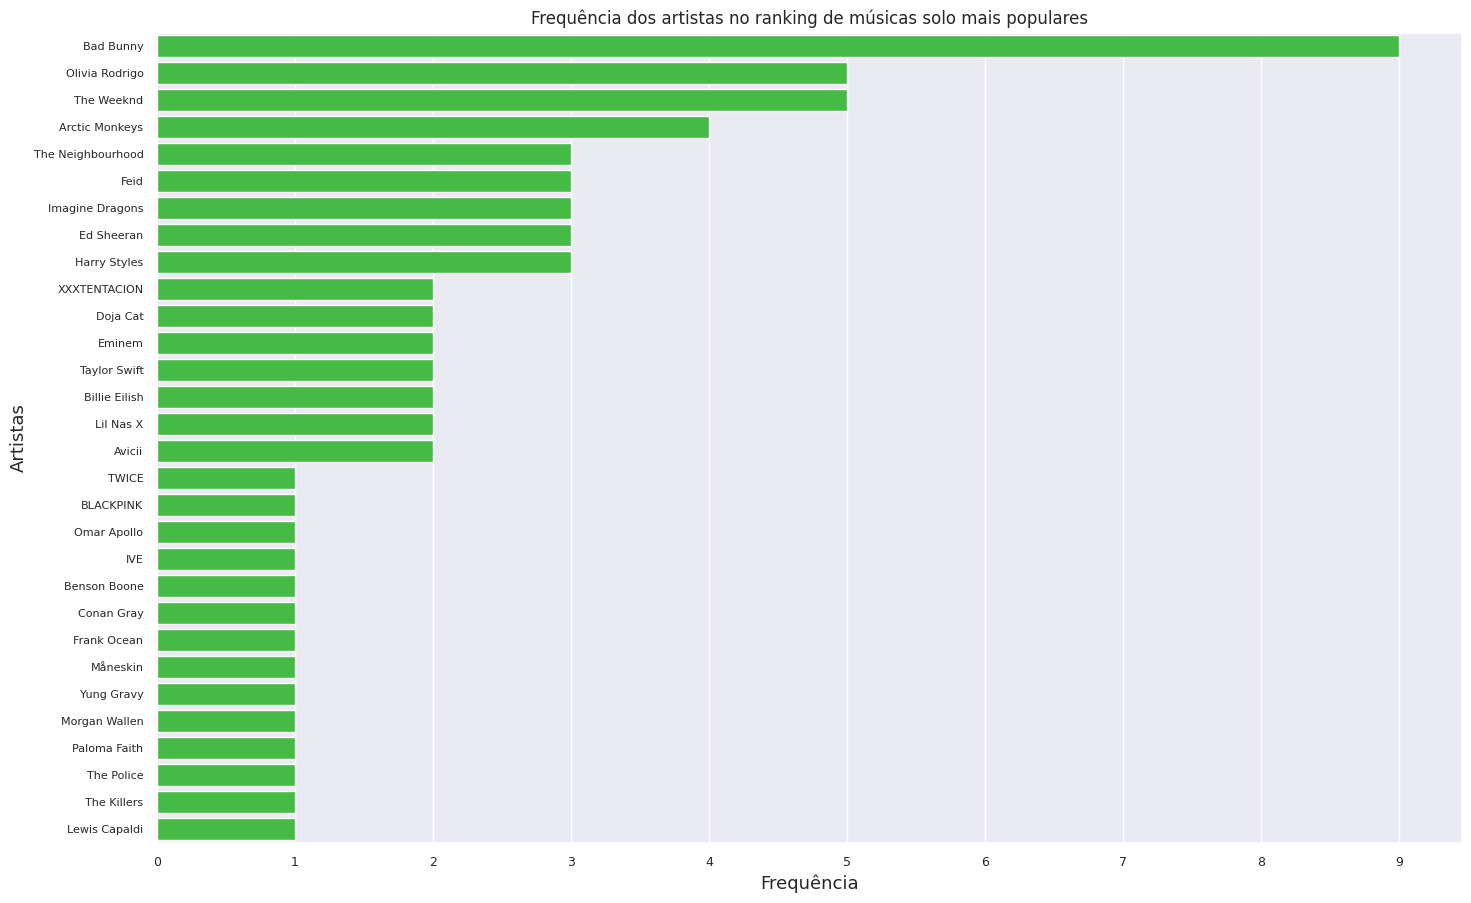

In [ ]:
plt.figure(figsize=(15,10))
bar = sns.barplot(data=top_100_solo_count.head(30), x='frequency', y='artists', orient='h', color='limegreen').set_title('Frequência dos artistas no ranking de músicas solo mais populares')
plt.xticks(ticks=range(0,10))
bar.axes.set_ylabel('Artistas',fontsize=13)
bar.axes.set_xlabel('Frequência',fontsize=13)
bar.axes.tick_params(axis='both', which='major', labelsize=8)
bar.axes.tick_params(axis='x', which='major', labelsize=9)

### Popularidade (feat)

Aqui mostra as músicas com feat mais populares 

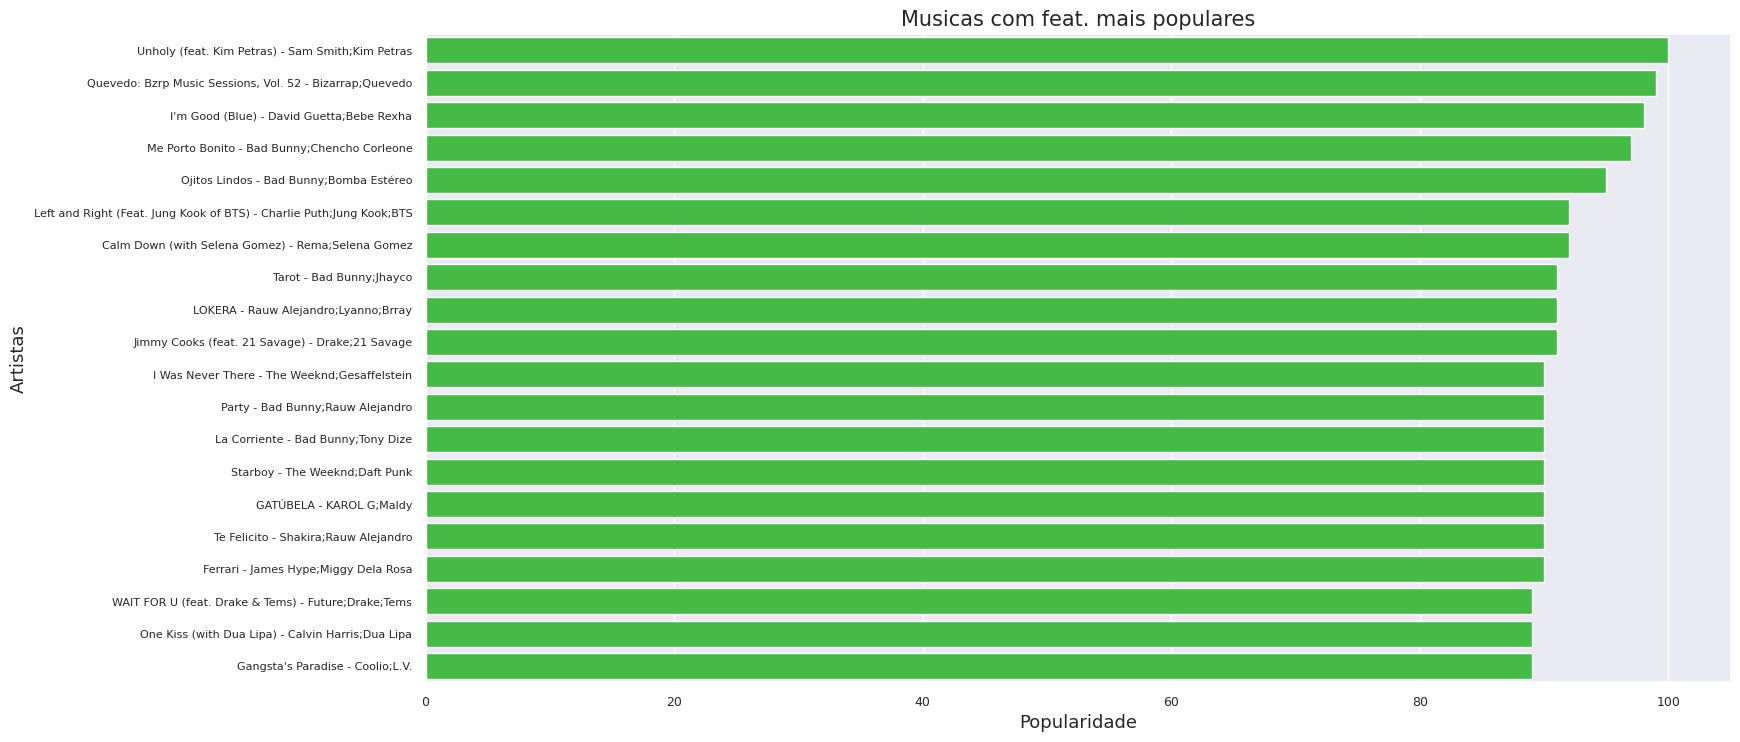

In [ ]:
musicas_com_feat = ranked_distinct_songs[ranked_distinct_songs['is_feature'] == True]

plt.figure(figsize=(15,8))
bar = sns.barplot(data=musicas_com_feat.head(20),y='artist_song', x='popularity', color='limegreen').set_title('Musicas com feat. mais populares', fontsize=15)
bar.axes.set_ylabel('Artistas',fontsize=13)
bar.axes.set_xlabel('Popularidade',fontsize=13)
bar.axes.tick_params(axis='both', which='major', labelsize=8)
bar.axes.tick_params(axis='x', which='major', labelsize=9)

In [ ]:
# Quais os artistas que aparecem mais vezes nas músicas com feat mais populares?

artists = []
for i in range(0,100):
  lista = musicas_com_feat.head(100)['artists'].values[i].split(';')
  for artist in range(0,len(lista)):
    artists.append(lista[artist])

# Frequência dos artistas nos top 100
top_100_feat_count = pd.Series(artists).value_counts()
top_100_feat_count = pd.DataFrame(top_100_feat_count, columns=['frequency'])
top_100_feat_count.reset_index(names='artists', inplace=True)
top_100_feat_count.head()

artists  frequency
0       Bad Bunny         16
1  Rauw Alejandro          6
2      The Weeknd          5
3   Justin Bieber          5
4          Eminem          5

Neste gráfico aparece a contagem dos artistas dentro das músicas com feat mais populares 

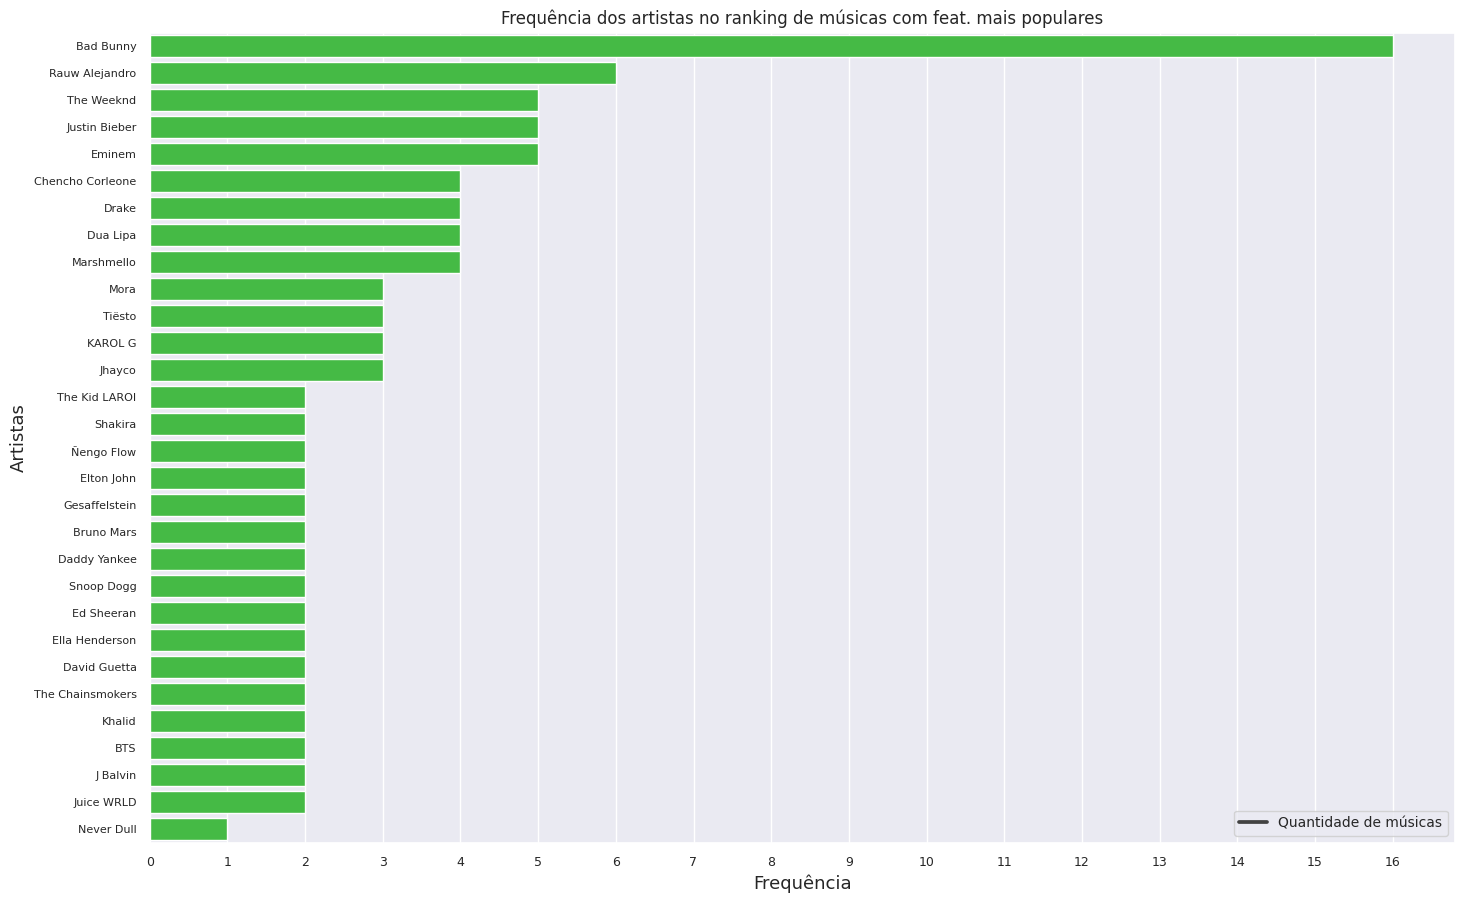

In [ ]:
plt.figure(figsize=(15,10))
bar = sns.barplot(data=top_100_feat_count.head(30), x='frequency', y='artists', orient='h', color='limegreen').set_title('Frequência dos artistas no ranking de músicas com feat. mais populares')
plt.xticks(ticks=range(0,17))
bar.axes.legend(['Quantidade de músicas'], loc='lower right', fontsize=10)
bar.axes.set_ylabel('Artistas',fontsize=13)
bar.axes.set_xlabel('Frequência',fontsize=13)
bar.axes.tick_params(axis='both', which='major', labelsize=8)
bar.axes.tick_params(axis='x', which='major', labelsize=9)

## Gráfico das distribuições

Proporção dos gêneros nas 100 músicas mais populares

In [ ]:
top_100 = ranked_distinct_songs.head(100)
top_100 = pd.DataFrame(top_100.track_genre.value_counts()).reset_index()
top_100.rename(columns={'index': 'track_genre', 'track_genre': 'count'}, inplace=True)

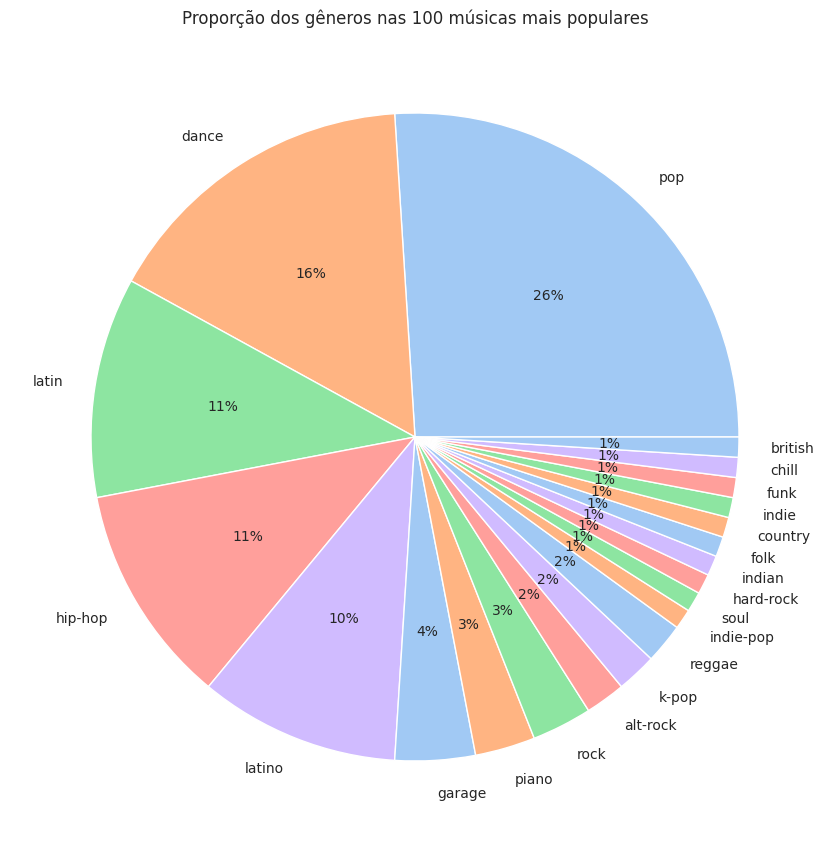

In [ ]:
#define data
top_100 = ranked_distinct_songs.head(100).track_genre.value_counts()
labels = top_100.index

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]


fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(aspect="equal"))
ax.pie(top_100, labels = labels, colors = colors, autopct='%.0f%%', textprops={'fontsize': 10})
ax.set_title('Proporção dos gêneros nas 100 músicas mais populares')
plt.show()


Contagem dos gêneros nas 100 músicas mais populares

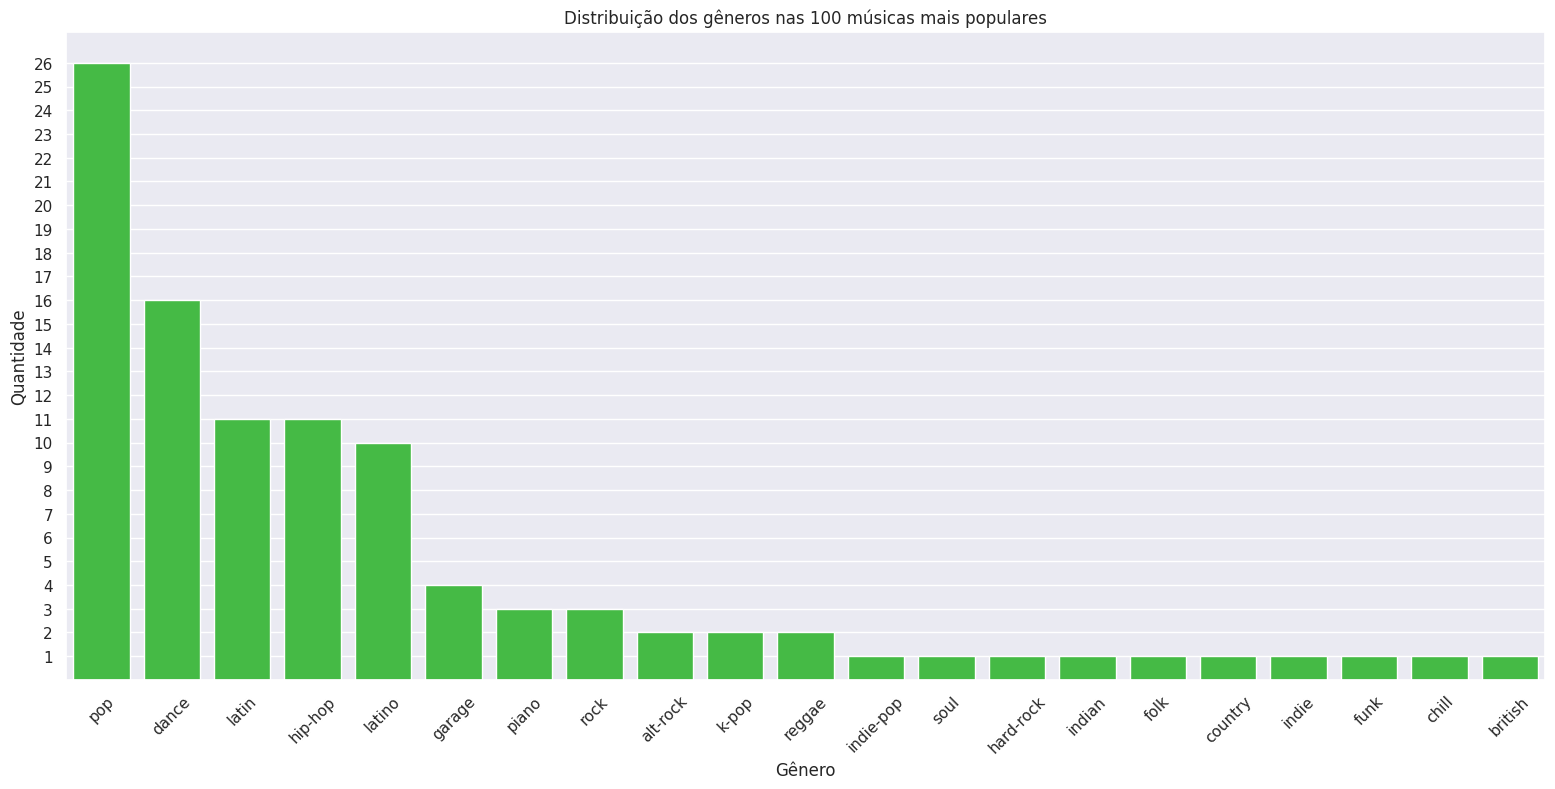

In [ ]:
# Cria um DataFrame com os dados formatados para o gráfico de barras empilhadas
data = pd.DataFrame({'Genre': labels, 'Count': top_100}).reset_index()

# Plota o gráfico de barras empilhadas
plt.figure(figsize=(17, 8))
ax = sns.barplot(data=data, y='Count', x='Genre', color='limegreen', orient='v')

# Define o título do gráfico
plt.title('Distribuição dos gêneros nas 100 músicas mais populares')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Gênero')
plt.xticks(rotation=45)
plt.yticks(range(1, 27))

# Exibe o gráfico
plt.show()


### Gáfico de boxplot representando a distribuição da popularidade por gênero nas 100 músicas mais populares

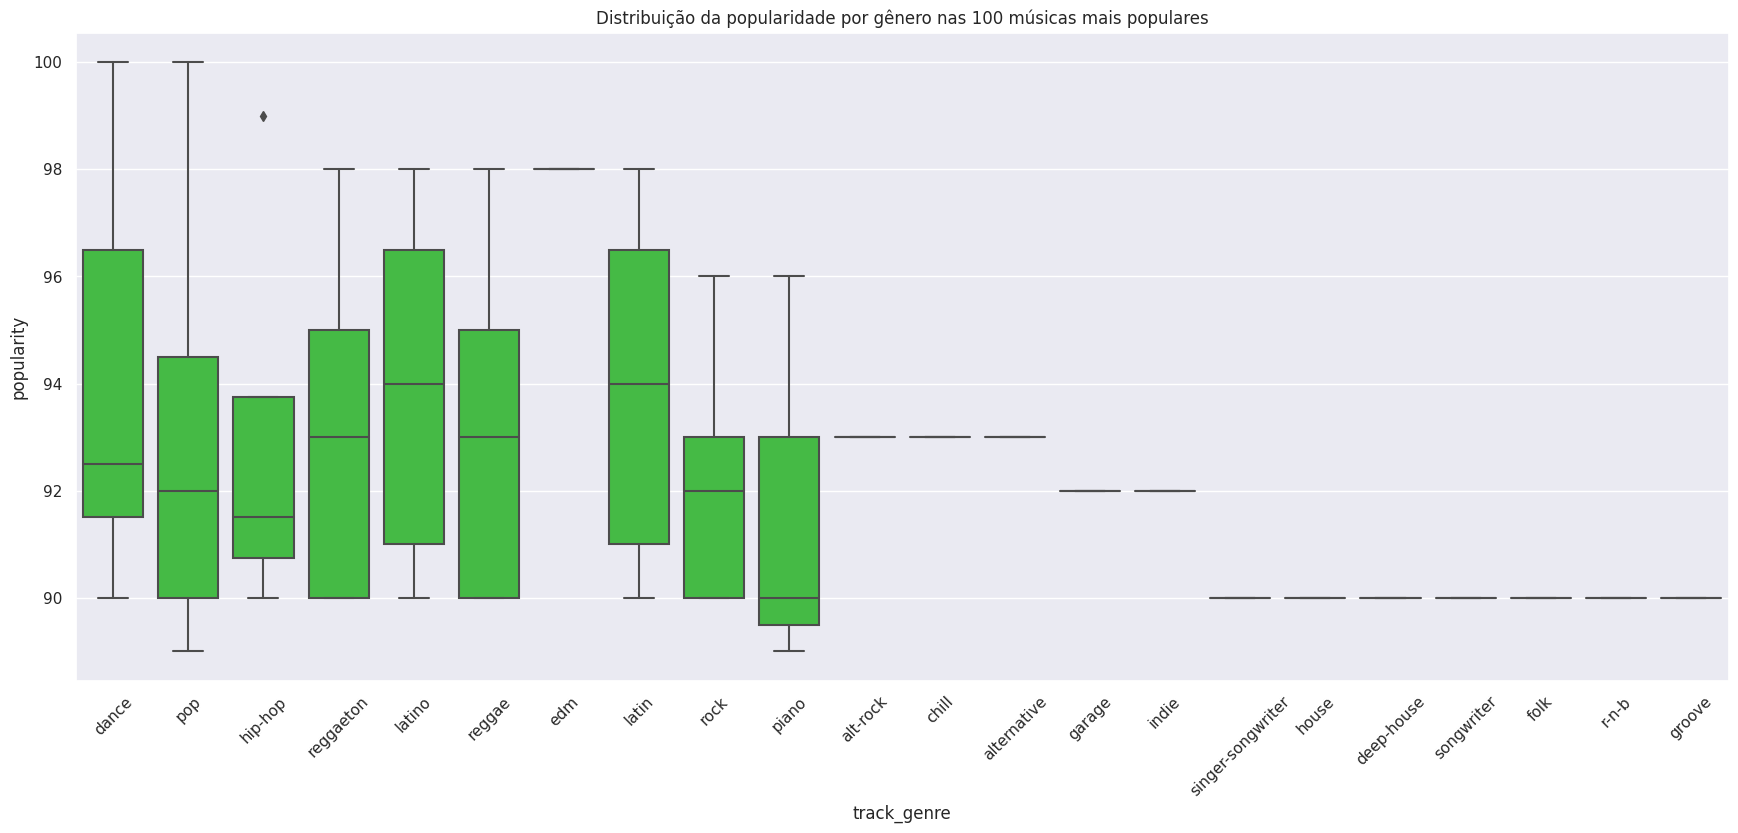

In [ ]:
plt.figure(figsize=(19,8))
boxplot = sns.boxplot(data = ranked_data.head(100), y= 'popularity', x = 'track_genre', color='limegreen').set_title(f"Distribuição da popularidade por gênero nas 100 músicas mais populares")
plt.xticks(rotation=45)
plt.show()

In [ ]:
distinct_songs = df[['artists', 'track_name','duration_ms',	'danceability',	'energy',	'speechiness', 'acousticness', 'instrumentalness', 'liveness',	'valence', 'track_genre', 'popularity']]
distinct_songs = distinct_songs.drop_duplicates(subset=['artists', 'track_name','duration_ms'])
distinct_songs.describe()

duration_ms  danceability        energy   speechiness  acousticness  \
count  8.307400e+04  83074.000000  83074.000000  83074.000000  83074.000000   
mean   2.312765e+05      0.559441      0.634864      0.088521      0.329985   
std    1.158306e+05      0.177296      0.258436      0.115810      0.339976   
min    8.586000e+03      0.000000      0.000000      0.000000      0.000000   
25%    1.738930e+05      0.447000      0.455000      0.036000      0.016000   
50%    2.152390e+05      0.573000      0.678000      0.049000      0.191000   
75%    2.670698e+05      0.690000      0.856000      0.086500      0.630000   
max    5.237295e+06      0.985000      1.000000      0.965000      0.996000   

       instrumentalness      liveness       valence    popularity  
count      83074.000000  83074.000000  83074.000000  83074.000000  
mean           0.182595      0.219429      0.464983     34.720996  
std            0.330123      0.197750      0.263411     19.526807  
min            0.000000      0.000000      0.000000      0.000000  
25%            0.000000      0.098500      0.243000     21.000000  
50%            0.000083      0.133000      0.451000     35.000000  
75%            0.140000      0.282000      0.678000     49.000000  
max            1.000000      1.000000      0.995000    100.000000

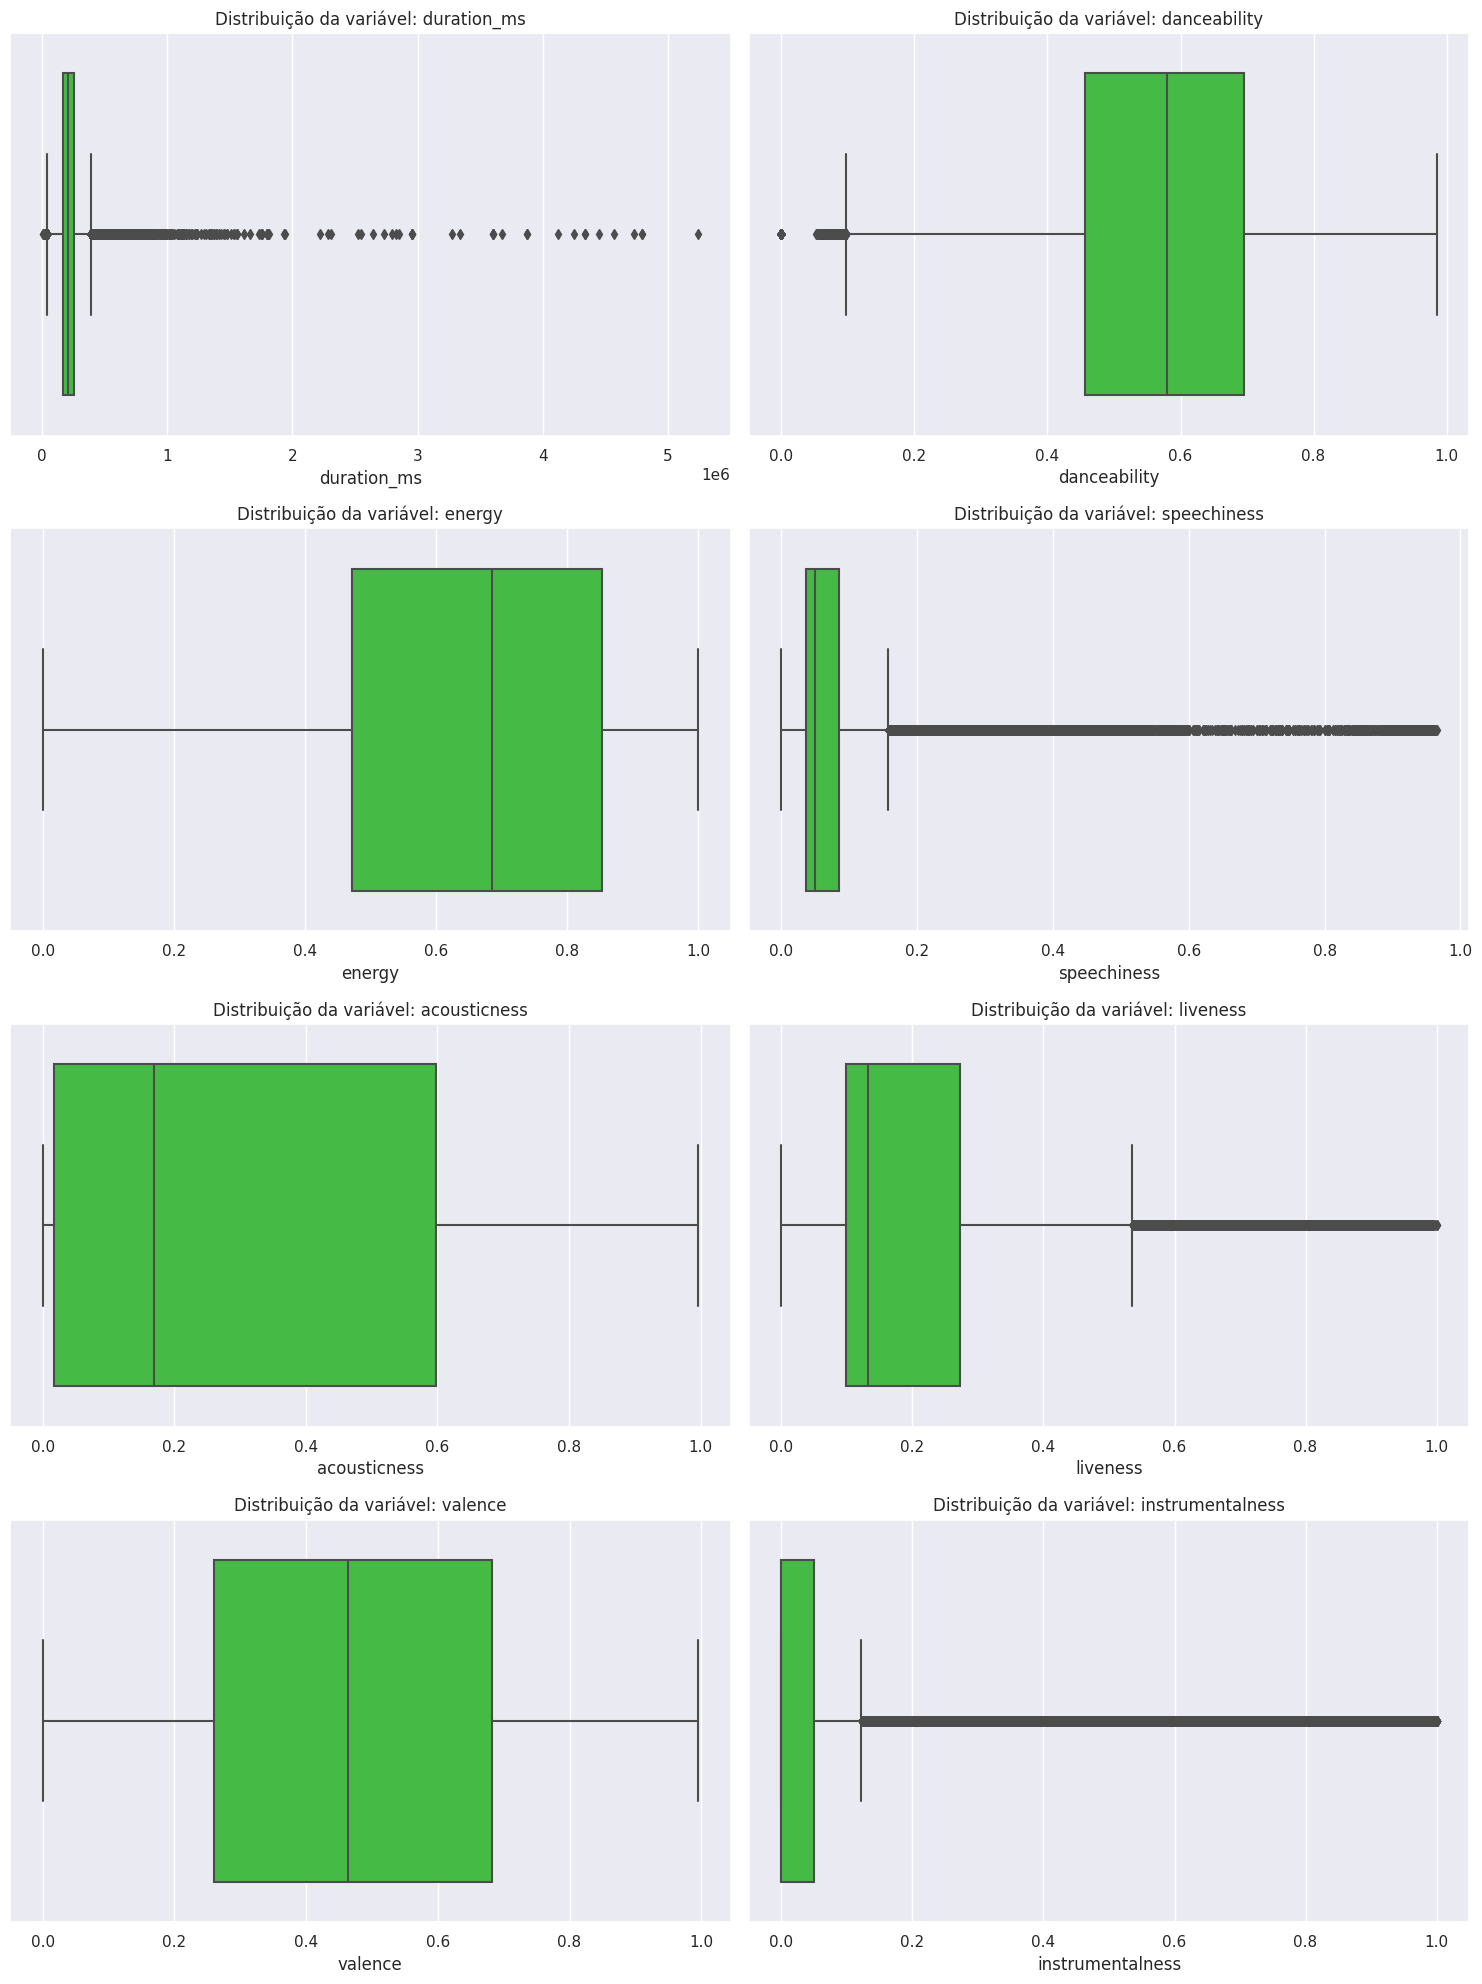

In [ ]:
features = ['duration_ms', 'danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence', 'instrumentalness']

num_rows = len(features) // 2  # Define o número de linhas como metade do número de características
num_cols = 2  # Define o número de colunas como 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Aumenta a altura dos subplots

for i, feature in enumerate(features):
    row = i // num_cols  # Determina a linha correspondente para o subplot
    col = i % num_cols  # Determina a coluna correspondente para o subplot
    sns.boxplot(data=df, x=feature, color='limegreen', ax=axes[row, col])
    axes[row, col].set_title(f"Distribuição da variável: {feature}")

plt.tight_layout()
plt.show()


### Gráfico de disperção scatterplot representando a distribuição da popularidade por gênero nas 100 músicas mais populares

<Figure size 1500x2000 with 0 Axes>

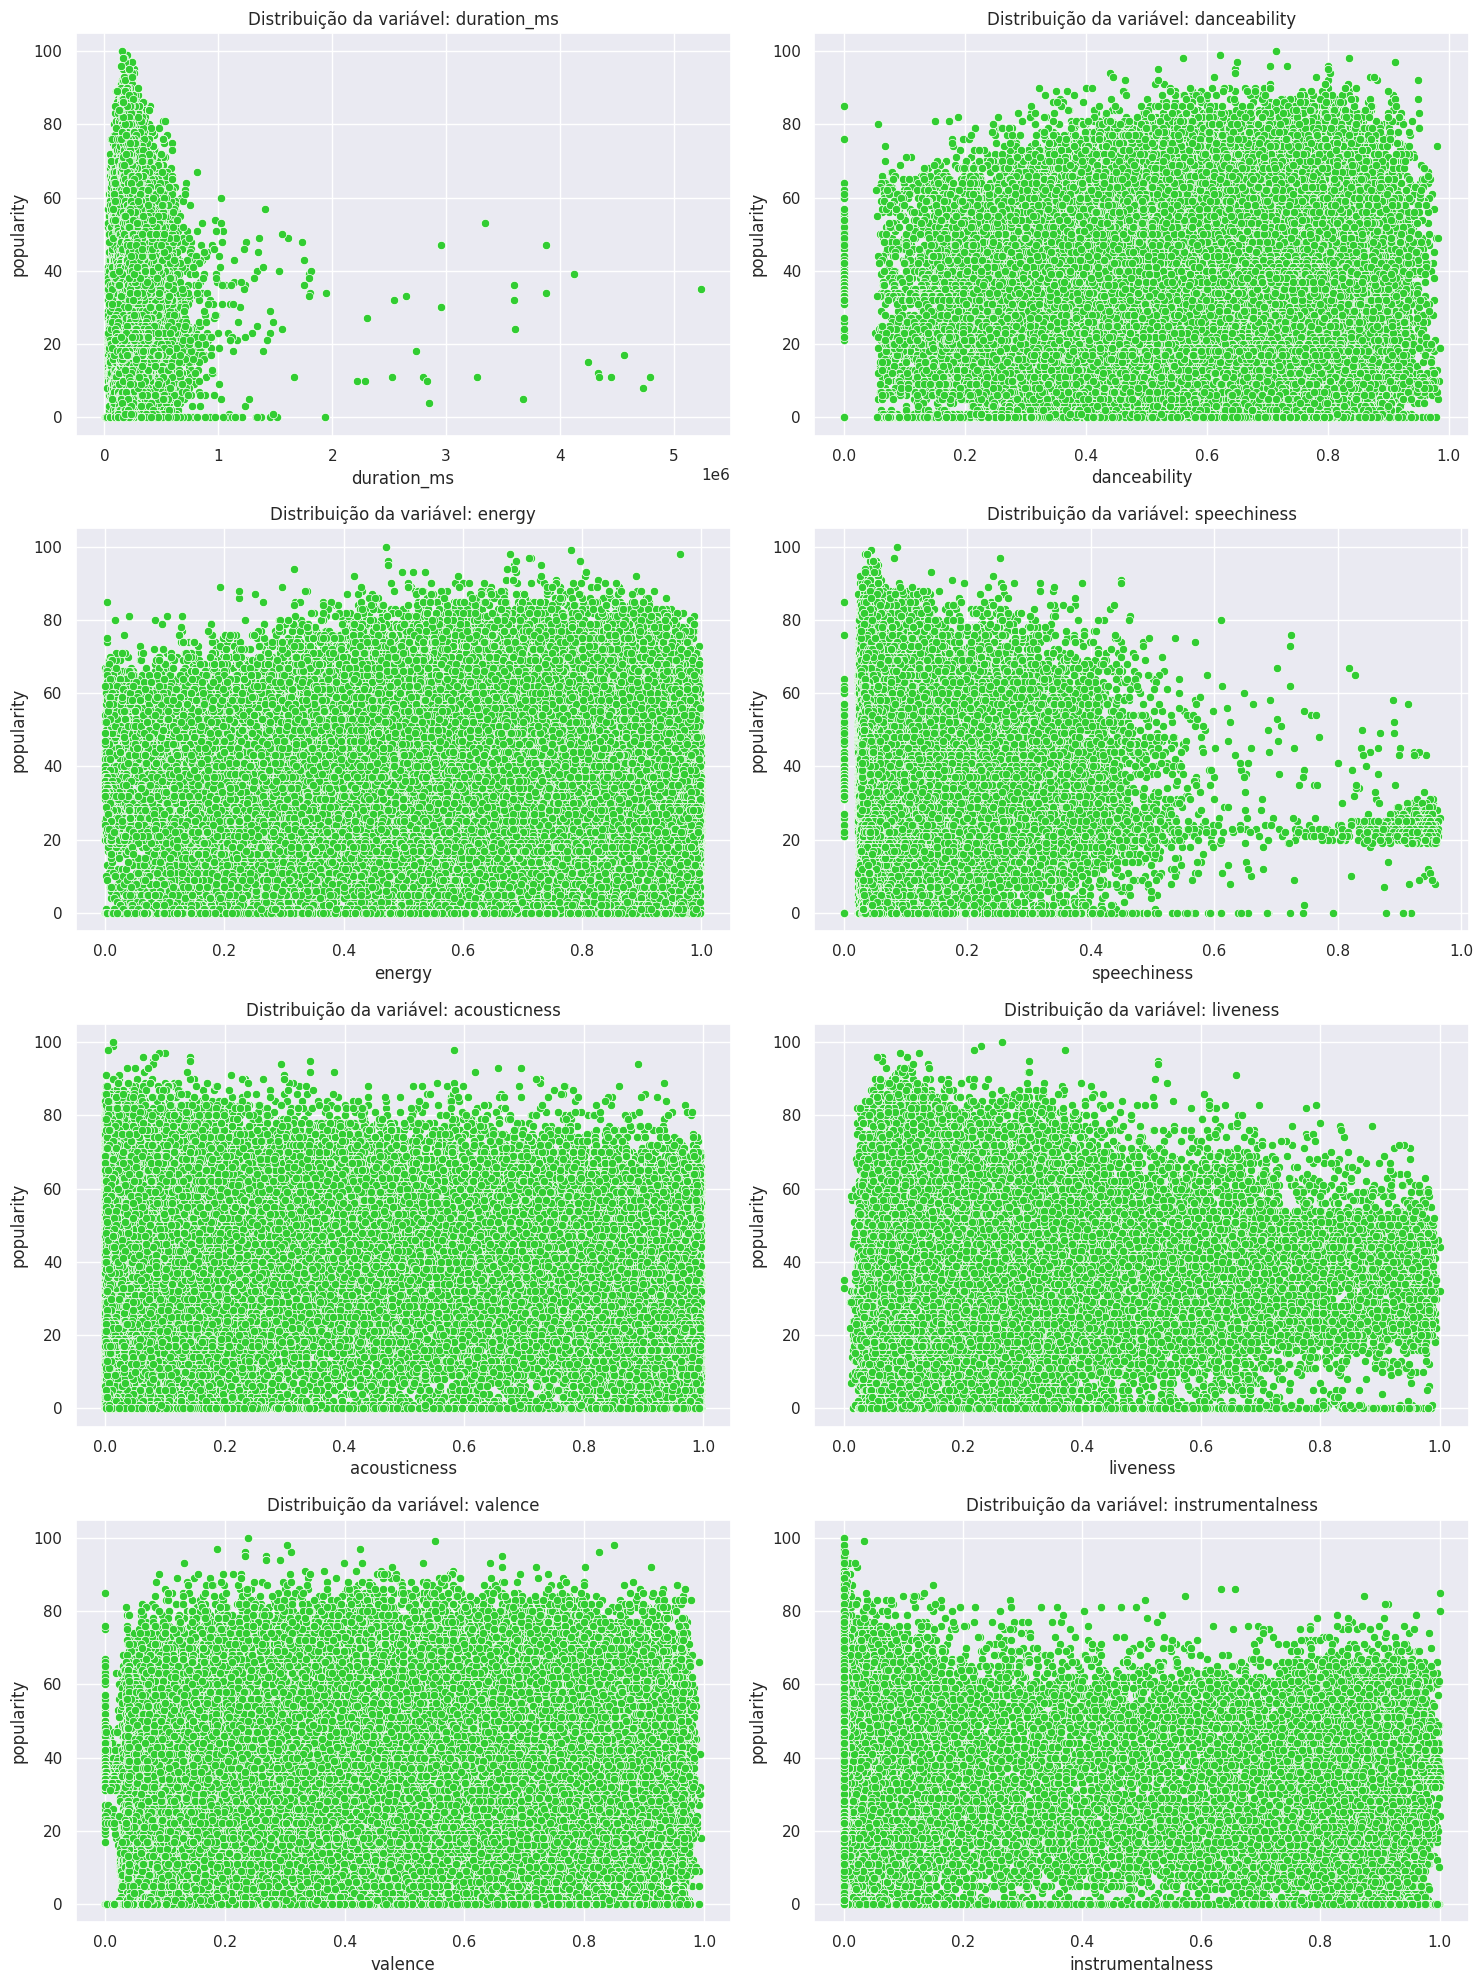

In [ ]:
plt.figure(figsize=(15, 20))  # Aumenta a figura verticalmente

features = ['duration_ms', 'danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence', 'instrumentalness']

num_rows = 4
num_cols = 2  # Altera o número de colunas para 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Aumenta a altura dos subplots

for i, feature in enumerate(features):
    row = i // num_cols  # Determina a linha correspondente para o subplot
    col = i % num_cols  # Determina a coluna correspondente para o subplot
    sns.scatterplot(data=df, x=feature, y='popularity', color='limegreen', ax=axes[row, col])
    axes[row, col].set_title(f"Distribuição da variável: {feature}")

plt.tight_layout()
plt.show()

### Histograma representando a distribuição das variáveis do nosso dataset

<Figure size 1500x2000 with 0 Axes>

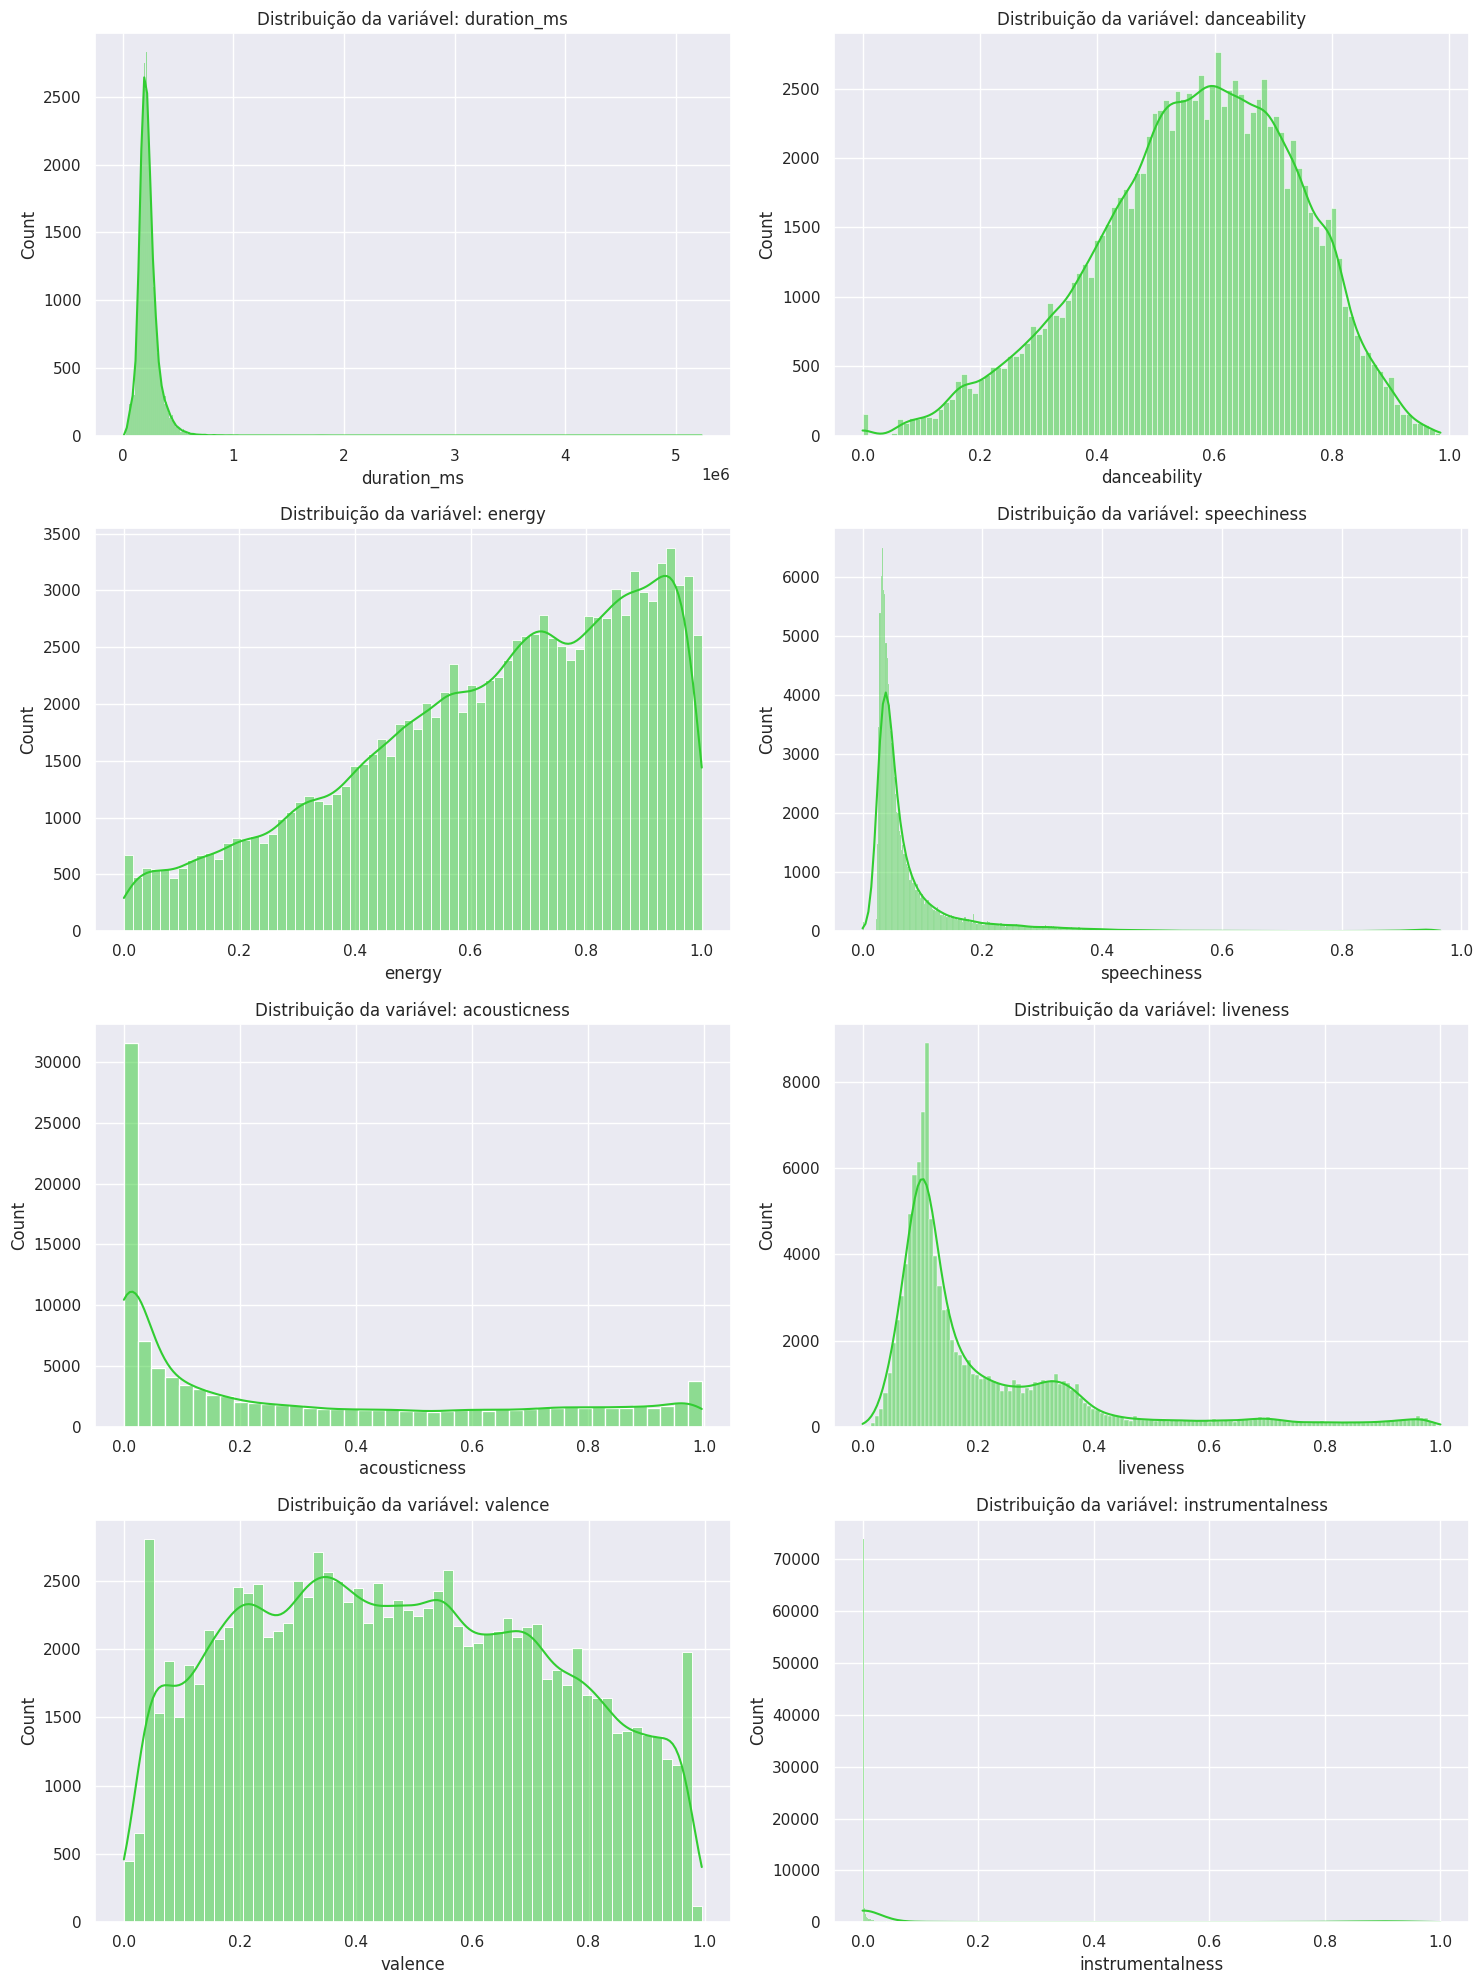

In [ ]:
plt.figure(figsize=(15, 20))  # Aumenta a figura verticalmente

features = ['duration_ms', 'danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence', 'instrumentalness']

num_rows = len(features) // 2  # Define o número de linhas como metade do número de características
num_cols = 2  # Define o número de colunas como 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Aumenta a altura dos subplots

for i, feature in enumerate(features):
    row = i // num_cols  # Determina a linha correspondente para o subplot
    col = i % num_cols  # Determina a coluna correspondente para o subplot
    sns.histplot(data=df, x=feature, color='limegreen', kde=True, ax=axes[row][col])
    axes[row][col].set_title(f"Distribuição da variável: {feature}")

plt.tight_layout()
plt.show()


### Músicas mais dancáveis são mais populares?

<Figure size 1500x1500 with 0 Axes>

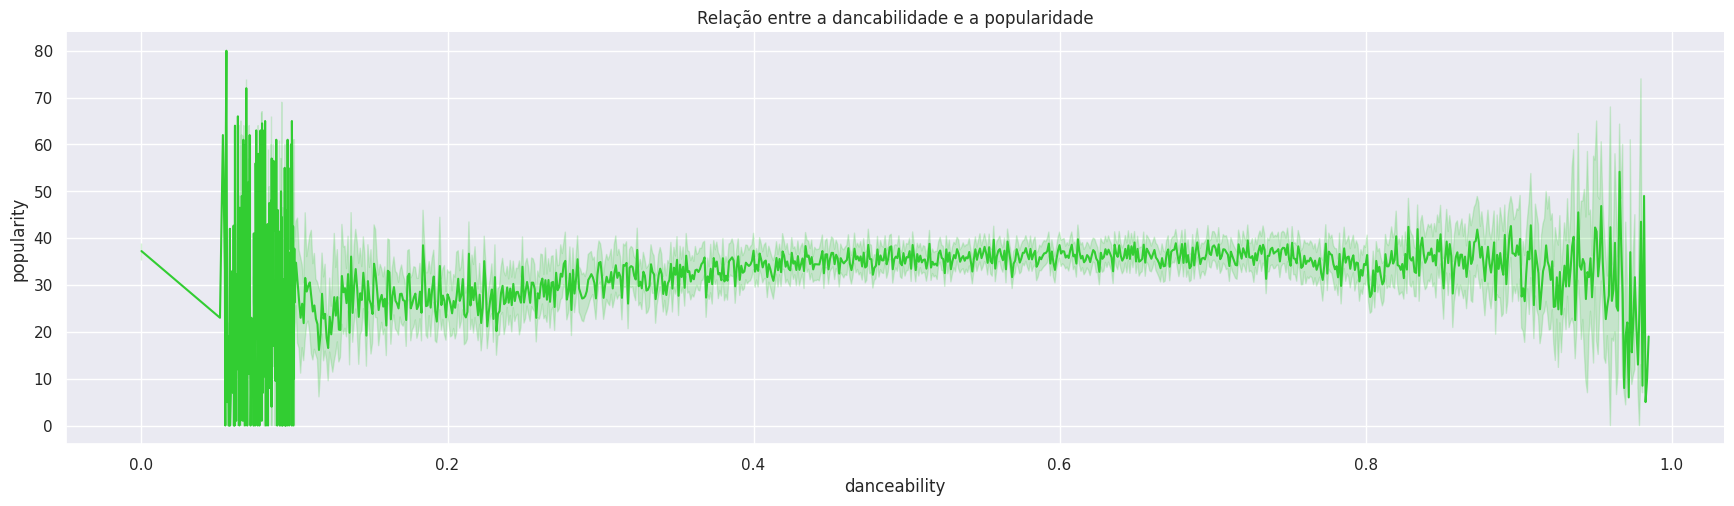

In [ ]:
plt.figure(figsize=(15,15))
plot = sns.relplot(
    data=distinct_songs, kind="line",
    x = 'danceability', y = 'popularity', color='limegreen', aspect=3.5
).set(title='Relação entre a dancabilidade e a popularidade')

###Gráficamente não observamos correlação direta das características com a popularidade

<ipython-input-103-ccdd03bdf719>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(distinct_songs.corr(), annot=True, cmap = "Greens").set(title='Gráfico de correlação entre as variáveis')


[Text(0.5, 1.0, 'Gráfico de correlação entre as variáveis')]

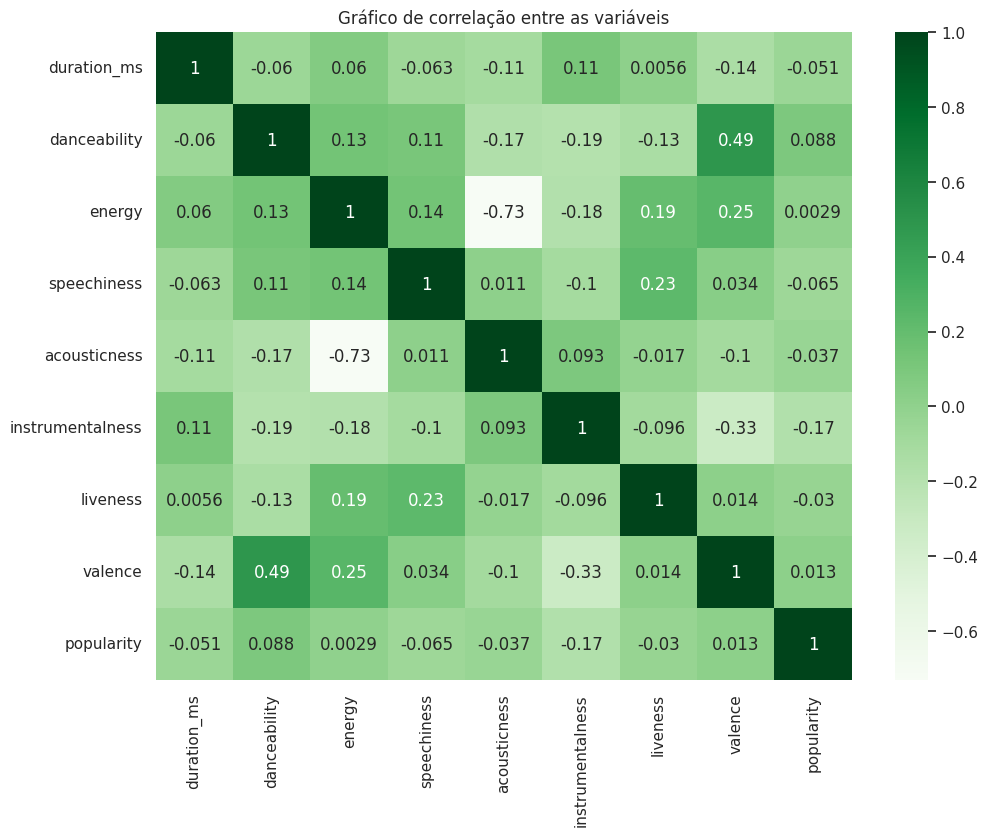

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(distinct_songs.corr(), annot=True, cmap = "Greens").set(title='Gráfico de correlação entre as variáveis')

## Após a análise dos dados


### Poderiamos usar as características das músicas para realizar um sistema de recomendação de músicas, utilizando um algorítimo não supervisionado para agrupar as músicas em clusters e a partir da música escolhida pelo usuário recomentar outras músicas dentro do mesmo cluster